<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Data Camp RAMP Challenge on the avalanche risk prediction in France

<i> Florent Blanc, Bryan Chen, Sibylle Degos, Alice Devilder, Rémy Grabet, Théo Paquier </i>

## Introduction

### Avalanche risk

Avalanches pose a significant threat to outdoor enthusiasts, ski patrol teams, and mountain communities. Predicting avalanche risk accurately is crucial for ensuring safety in mountainous regions. This challenge aims to leverage data science to analyze and forecast avalanche risk based on historical reports from Météo-France. By processing and interpreting structured data extracted from avalanche risk bulletins, we can improve preparedness and decision-making in avalanche-prone areas.  

### The BERA database, a catalog of avalanche risk bulletins

The data for this challenge comes from **Météo-France** through the **Bulletins d'Estimation du Risque d'Avalanche (BERA)**, which provide official assessments of avalanche hazards. Originally, these reports were only available in PDF format, making them difficult to analyze systematically. However, [multi-coop](https://gitlab.com/multi-coop/meteofrance_bra_hist) has extracted and structured this data into CSV files, categorized by mountain region (massif) and publication date.

The dataset consists of **34,286 records**, each representing a daily avalanche risk bulletin for a specific massif. It includes **47 features**, covering information on:
- **Avalanche risk levels (`risque1`, `risque2`, `risque_maxi`)** at different altitudes.
- **Geographic and temporal data (`massif`, `altitude`, `date`)**.
- **Weather conditions (`isotherme_0`, `precipitation_neige_veille_epaisseur`, `vent_altitude_*`)**.
- **Risk evolution trends (`evolurisque1`, `evolurisque2`)**.

This dataset provides a historical record of avalanche risk conditions, making it a valuable resource for predictive modeling.

### What is the task this challenge aims to solve?  
The main objective of this challenge is to **predict avalanche risk in France** based on the structured BERA data. By analyzing historical risk reports and meteorological conditions, we can develop models that estimate avalanche hazards more effectively.  

This task has multiple applications. First, it can help outdoor enthusiasts, ski patrols, and mountain rescue teams plan safer routes and make informed decisions before heading into avalanche-prone terrain. Additionally, the challenge aims to serve as an educational tool for analyzing past avalanche incidents, helping researchers and safety experts understand risk factors. Finally, by improving real-time risk estimation models, the challenge contributes to broader efforts in avalanche forecasting and disaster prevention.  

### Why does it matter?  
Avalanches are a deadly natural hazard, posing risks to skiers, snowboarders, mountaineers, and local communities. Developing accurate avalanche prediction models can save lives by providing crucial insights into when and where avalanches are most likely to occur.  

Improved avalanche forecasting enhances safety measures for ski resorts, backcountry travelers, and rescue operations. It also contributes to environmental and climate research, as avalanche behavior is influenced by broader weather patterns and climate change. By transforming unstructured reports into actionable insights, this challenge harnesses the power of data science to improve preparedness and response in mountainous regions.  

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

### Get access to the training data

The dataset includes the following mountain ranges:

This is a list of mountain ranges:

<table>
  <tr>
    <td colspan="5" align="center"><strong>Mountain Ranges</strong></td>
  </tr>
  <tr>
    <td>ANDORRE</td> <td>ARAVIS</td> <td>ASPE-OSSAU</td> <td>AURE-LOURON</td> <td>BAUGES</td>
  </tr>
  <tr>
    <td>BEAUFORTAIN</td> <td>BELLEDONNE</td> <td>CAPCIR-PUYMORENS</td> <td>CERDAGNE-CANIGOU</td> <td>CHABLAIS</td>
  </tr>
  <tr>
    <td>CHAMPSAUR</td> <td>CHARTREUSE</td> <td>CINTO-ROTONDO</td> <td>COUSERANS</td> <td>DEVOLUY</td>
  </tr>
  <tr>
    <td>EMBRUNAIS-PARPAILLON</td> <td>GRANDES-ROUSSES</td> <td>HAUT-VAR_HAUT-VERDON</td> <td>HAUTE-ARIEGE</td> <td>HAUTE-BIGORRE</td>
  </tr>
  <tr>
    <td>HAUTE-MAURIENNE</td> <td>HAUTE-TARENTAISE</td> <td>LUCHONNAIS</td> <td>MAURIENNE</td> <td>MERCANTOUR</td>
  </tr>
  <tr>
    <td>MONT-BLANC</td> <td>OISANS</td> <td>ORLU__ST_BARTHELEMY</td> <td>PAYS-BASQUE</td> <td>PELVOUX</td>
  </tr>
  <tr>
    <td>QUEYRAS</td> <td>RENOSO-INCUDINE</td> <td>THABOR</td> <td>UBAYE</td> <td>VANOISE</td>
  </tr>
  <tr>
    <td>VERCORS</td> <td></td> <td></td> <td></td> <td></td>
  </tr>
</table>


For now, let's start by exploring the data for a single mountain range, for example, **VANOISE**.

In [2]:
import problem
X_df_van, y_van = problem.get_train_data('VANOISE')

In [3]:
X_df_van

,temps,direction_vent_altitude_1,direction_vent_altitude_2,evolurisque1,evolurisque2,altitude,precipitation_neige_veille_epaisseur,limite_pluie_neige,isotherme_0,isotherme_moins_10,vitesse_vent_altitude_1,is_pluie
date,,,,,,,,,,,,
2018-12-17 00:00:00,Neige modérée,NW,NW,3.0,2.0,2400.0,10.0,1200.0,1500.0,3000.0,20.0,0
2018-12-17 06:00:00,Neige faible,NW,NW,3.0,2.0,2400.0,10.0,1000.0,1100.0,2700.0,30.0,0
2018-12-17 12:00:00,Variable,NW,NW,3.0,2.0,2400.0,10.0,1000.0,1100.0,2600.0,30.0,0
2018-12-18 00:00:00,Beau temps,NW,NW,3.0,2.0,2400.0,3.0,1000.0,1900.0,3900.0,10.0,0
2018-12-18 06:00:00,Beau temps,W,NW,3.0,2.0,2400.0,3.0,1000.0,2200.0,4000.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 06:00:00,Très nuageux,SW,W,2.0,3.0,2200.0,1.0,1700.0,2200.0,3800.0,50.0,0
2022-12-30 12:00:00,Averses de pluie,W,W,2.0,3.0,2200.0,1.0,2000.0,2200.0,4300.0,50.0,0
2022-12-31 00:00:00,Pluie faible / grésille,SW,W,2.0,3.0,2400.0,1.0,2700.0,2500.0,4600.0,30.0,1


## The static features

- **Avalanche risk levels**: 
  - `risque1`: Estimated risk level for all altitudes or the lowest ones.
  - `risque2`: Estimated risk level for the highest altitudes.
  - `risque_maxi`: The highest risk level reported for a given massif.
- **Geographic and temporal information**:
  - `date`: The publication date of the bulletin.
  - `massif`: The mountain region for which the risk is assessed.
  - `altitude`: Altitude information, if available.
- **Meteorological conditions**:
  - `isotherme_0`: Altitude of the 0°C isotherm.
  - `isotherme_moins_10`: Altitude of the -10°C isotherm.
  - `precipitation_neige_veille_epaisseur`: Snowfall height measured the day before.
  - `vitesse_vent_altitude_1`: Wind speed at a lower altitude.
  - `vitesse_vent_altitude_2`: Wind speed at a higher altitude.
  - `direction_vent_altitude_1`: Wind direction at a lower altitude.
  - `direction_vent_altitude_2`: Wind direction at a higher altitude.
  - `limite_pluie_neige`: Rain-snow limit altitude.
- **Risk evolution and additional context**:
  - `evolurisque1`, `evolurisque2`: Evolution of risk levels over time.
  - `commentaire`: Additional commentary on risk conditions.
  - `url_telechargement`: Link to the original BERA report in PDF format. 

In [4]:
X_df_van.describe()

,evolurisque1,evolurisque2,altitude,precipitation_neige_veille_epaisseur,limite_pluie_neige,isotherme_0,isotherme_moins_10,vitesse_vent_altitude_1,is_pluie
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,2.444984,3.111650,2299.352751,2.991909,1262.513484,2108.683927,3817.691478,22.206041,0.071197
std,0.676444,0.587644,323.248507,6.406995,742.439746,841.256156,831.289001,18.770596,0.257224
min,1.000000,2.000000,1500.000000,0.000000,0.000000,0.000000,1600.000000,0.000000,0.000000
25%,2.000000,3.000000,2000.000000,0.000000,700.000000,1500.000000,3300.000000,10.000000,0.000000
50%,2.000000,3.000000,2300.000000,0.000000,1200.000000,2200.000000,3900.000000,20.000000,0.000000
75%,3.000000,3.000000,2500.000000,2.000000,1800.000000,2737.500000,4400.000000,30.000000,0.000000
max,4.000000,4.000000,3200.000000,50.000000,3500.000000,4000.000000,5700.000000,130.000000,1.000000


In [5]:
X_df_van.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1854 entries, 2018-12-17 00:00:00 to 2022-12-31 12:00:00
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   temps                                 1854 non-null   object 
 1   direction_vent_altitude_1             1854 non-null   object 
 2   direction_vent_altitude_2             1854 non-null   object 
 3   evolurisque1                          1854 non-null   float64
 4   evolurisque2                          1854 non-null   float64
 5   altitude                              1854 non-null   float64
 6   precipitation_neige_veille_epaisseur  1854 non-null   float64
 7   limite_pluie_neige                    1854 non-null   float64
 8   isotherme_0                           1854 non-null   float64
 9   isotherme_moins_10                    1854 non-null   float64
 10  vitesse_vent_altitude_1               1854 non-n

In [6]:
X_df_van.isna().sum()

temps                                   0
direction_vent_altitude_1               0
direction_vent_altitude_2               0
evolurisque1                            0
evolurisque2                            0
altitude                                0
precipitation_neige_veille_epaisseur    0
limite_pluie_neige                      0
isotherme_0                             0
isotherme_moins_10                      0
vitesse_vent_altitude_1                 0
is_pluie                                0
dtype: int64

## The risk levels

The avalanche risk levels are classified into five categories, ranging from low to extreme risk. These levels are defined as follows:

- **Level 1 (Low)**: Low risk of avalanches, natural triggers are unlikely.

- **Level 2 (Moderate)**: Moderate risk of avalanches, natural triggers are possible.

- **Level 3 (Considerable)**: Considerable risk of avalanches, natural triggers are likely.

- **Level 4 (High)**: High risk of avalanches, natural triggers are very likely.

- **Level 5 (Very High)**: Very high risk of avalanches, natural triggers are certain.

The risk levels are reported for different altitudes, with `risque1` and `risque2` representing the risk levels at lower and higher altitudes, respectively. The `risque_maxi` variable indicates the highest risk level reported for a given massif.

`y_van` represents the **maximum avalanche risk (`risque_maxi`)** for each timestamp in the Vanoise massif It contains values from **1 to 5**, corresponding to different avalanche risk levels.

In [7]:
y_van

date
2018-12-17 00:00:00    3.0
2018-12-17 06:00:00    3.0
2018-12-17 12:00:00    3.0
2018-12-18 00:00:00    3.0
2018-12-18 06:00:00    3.0
                      ... 
2022-12-30 06:00:00    3.0
2022-12-30 12:00:00    3.0
2022-12-31 00:00:00    2.0
2022-12-31 06:00:00    2.0
2022-12-31 12:00:00    2.0
Name: risque_maxi, Length: 1854, dtype: float64

In [8]:
y_van.isna().sum()

np.int64(0)

In [9]:
print(y_van.value_counts(normalize=True))  

risque_maxi
2.0    0.467638
3.0    0.362460
1.0    0.092233
4.0    0.076052
5.0    0.001618
Name: proportion, dtype: float64


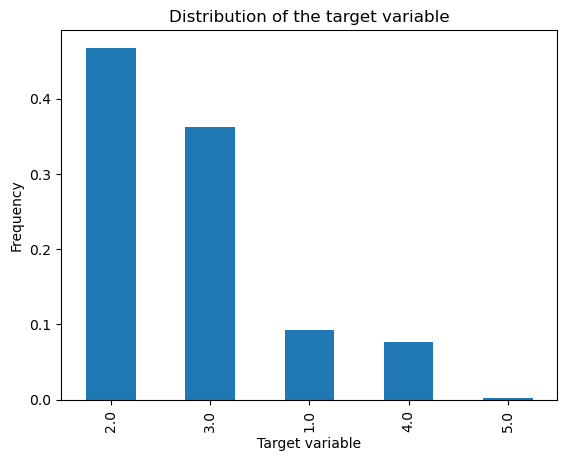

In [10]:
y_van.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Frequency')
plt.show()

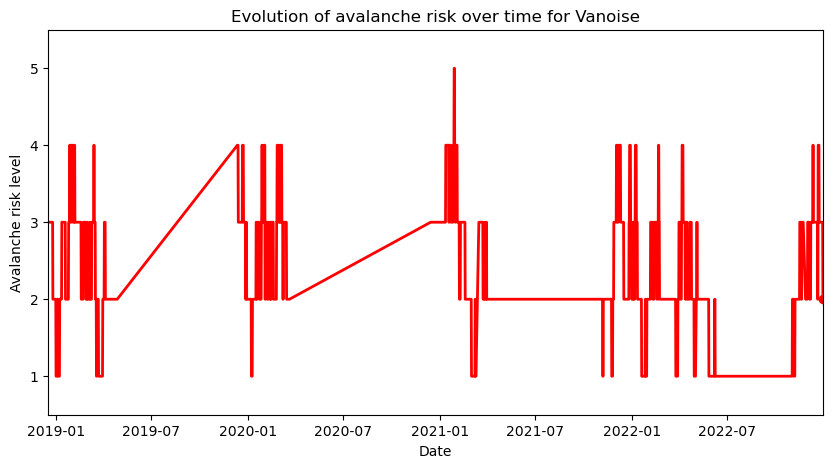

In [11]:
import matplotlib.animation as animation

y_van.index = pd.to_datetime(y_van.index)
# Sort values by date
y_van = y_van.sort_index()  

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(y_van.index.min(), y_van.index.max())
ax.set_ylim(y_van.min() - 0.5, y_van.max() + 0.5)
ax.set_xlabel("Date")
ax.set_ylabel("Avalanche risk level")
ax.set_title("Evolution of avalanche risk over time for Vanoise")

# Create an empty line plot
line, = ax.plot([], [], 'r-', lw=2)
point, = ax.plot([], [], 'ro', markersize=6)

# Function to initialize animation
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Function to update the animation frame by frame
def update(frame):
    x = np.array(y_van.index[:frame]) 
    y = np.array(y_van.values[:frame])
    line.set_data(x, y)

    if len(x) > 0:
        point.set_data([x[-1]], [y[-1]])

    return line, point

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(y_van), init_func=init, blit=True, interval=50)

# Save as GIF
ani.save("avalanche_risk_evolution_vanoise.gif", writer="pillow", fps=30)

plt.show()


### Now, let's get the whole dataset to get a sense of the data we are working with.

In [12]:
X_df, y = problem.get_data()

In [13]:
X_df["massif"].unique()

array(['ANDORRE', 'ARAVIS', 'ASPE-OSSAU', 'AURE-LOURON', 'BAUGES',
       'BEAUFORTAIN', 'BELLEDONNE', 'CAPCIR-PUYMORENS',
       'CERDAGNE-CANIGOU', 'CHABLAIS', 'CHAMPSAUR', 'CHARTREUSE',
       'CINTO-ROTONDO', 'COUSERANS', 'DEVOLUY', 'EMBRUNAIS-PARPAILLON',
       'GRANDES-ROUSSES', 'HAUT-VAR_HAUT-VERDON', 'HAUTE-ARIEGE',
       'HAUTE-BIGORRE', 'HAUTE-MAURIENNE', 'HAUTE-TARENTAISE',
       'LUCHONNAIS', 'MAURIENNE', 'MERCANTOUR', 'MONT-BLANC', 'OISANS',
       'ORLU__ST_BARTHELEMY', 'PAYS-BASQUE', 'PELVOUX', 'QUEYRAS',
       'RENOSO-INCUDINE', 'THABOR', 'UBAYE', 'VANOISE', 'VERCORS'],
      dtype=object)

In [14]:
X_df

,massif,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,temps,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,direction_vent_altitude_1,vitesse_vent_altitude_1,direction_vent_altitude_2,vitesse_vent_altitude_2,is_pluie,no_mer_de_nuages
date,,,,,,,,,,,,,,,,,,,,,
2018-12-18 00:00:00,ANDORRE,NaN,NaN,2300.0,1.0,2.0,1800.0,0.0,Peu nuageux,0,200.0,3200.0,4600.0,2000.0,3000.0,_,0.0,NW,30.0,0,1
2018-12-18 06:00:00,ANDORRE,NaN,NaN,2300.0,1.0,2.0,1800.0,0.0,Beau temps,0,200.0,3200.0,4700.0,2000.0,3000.0,NE,10.0,W,40.0,0,1
2018-12-18 12:00:00,ANDORRE,NaN,NaN,2300.0,1.0,2.0,1800.0,0.0,Brume,0,200.0,3200.0,4800.0,2000.0,3000.0,_,0.0,W,40.0,0,1
2018-12-19 00:00:00,ANDORRE,NaN,NaN,2300.0,1.0,2.0,1800.0,0.0,Très nuageux,0,200.0,2700.0,4400.0,2000.0,3000.0,S,10.0,SW,50.0,0,1
2018-12-19 06:00:00,ANDORRE,NaN,NaN,2300.0,1.0,2.0,1800.0,0.0,Peu nuageux,0,200.0,2000.0,3900.0,2000.0,3000.0,_,0.0,W,60.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08 06:00:00,VERCORS,NaN,NaN,NaN,1.0,1.0,1800.0,0.0,Peu nuageux,0,3000.0,3400.0,5100.0,1500.0,2000.0,S,10.0,S,20.0,1,1
2023-06-08 12:00:00,VERCORS,NaN,NaN,NaN,1.0,1.0,1800.0,0.0,Pluies éparses,0,3300.0,3600.0,5100.0,1500.0,2000.0,S,10.0,S,20.0,1,1
2023-06-09 00:00:00,VERCORS,NaN,NaN,NaN,1.0,1.0,1800.0,0.0,Peu nuageux,0,3300.0,3700.0,5600.0,1500.0,2000.0,S,10.0,S,20.0,1,1


In [15]:
X_df.describe()

,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,vitesse_vent_altitude_1,vitesse_vent_altitude_2,is_pluie,no_mer_de_nuages
count,11025.000000,2799.000000,33795.000000,81999.000000,81999.000000,81999.0,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000
mean,2.337687,2.645230,2247.536618,1.641313,2.038927,1800.0,2.553177,32.251918,1461.328187,2248.182295,3980.458298,2222.551495,2805.235430,20.437749,31.554104,0.123111,0.967585
std,0.595230,0.720057,284.529517,0.762309,0.824541,0.0,6.446649,229.580003,771.516267,852.582664,811.239360,606.533468,568.908987,18.943829,23.779349,0.328567,0.177101
min,1.000000,1.000000,1300.000000,-1.000000,-1.000000,1800.0,0.000000,-1.000000,0.000000,0.000000,1000.000000,1000.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2000.000000,1.000000,1.000000,1800.0,0.000000,0.000000,800.000000,1600.000000,3500.000000,2000.000000,2000.000000,10.000000,10.000000,0.000000,1.000000
50%,2.000000,3.000000,2200.000000,1.000000,2.000000,1800.0,0.000000,0.000000,1400.000000,2300.000000,4100.000000,2000.000000,3000.000000,10.000000,30.000000,0.000000,1.000000
75%,3.000000,3.000000,2400.000000,2.000000,3.000000,1800.0,1.000000,0.000000,2000.000000,2900.000000,4600.000000,3000.000000,3000.000000,30.000000,40.000000,0.000000,1.000000
max,5.000000,4.000000,3600.000000,5.000000,5.000000,1800.0,70.000000,3100.000000,4100.000000,4700.000000,6300.000000,3000.000000,4000.000000,150.000000,160.000000,1.000000,1.000000


In [16]:
X_df.isna().sum()

massif                                      0
evolurisque1                            70974
evolurisque2                            79200
altitude                                48204
risque1                                     0
risque2                                     0
precipitation_neige_veille_altitude         0
precipitation_neige_veille_epaisseur        0
temps                                       0
mer_de_nuages                               0
limite_pluie_neige                          0
isotherme_0                                 0
isotherme_moins_10                          0
altitude_vent_1                             0
altitude_vent_2                             0
direction_vent_altitude_1                   0
vitesse_vent_altitude_1                     0
direction_vent_altitude_2                   0
vitesse_vent_altitude_2                     0
is_pluie                                    0
no_mer_de_nuages                            0
dtype: int64

In [17]:
data = pd.concat([X_df,y],axis=1)

## Map with the risk levels

In [121]:
import geopandas as gpd
import folium
import branca

In [119]:
montagnes = gpd.read_file('data\Metadata_massif_DP_2024_20240215.geojson')

montagnes['title'] = montagnes['title'].str.upper()

list_mdf = sorted(montagnes['title'].unique())
list_xdf = sorted(X_df['massif'].unique())

for i, name in enumerate(list_mdf):
    if name not in list_xdf:
        print(name, list_xdf[i])
        montagnes.replace(to_replace=name,value=list_xdf[i],
                         inplace=True)

x_plot = data[['massif','risque_maxi']].copy()

x_plot = x_plot[x_plot.index.month == 4]

x_plot['month'] = x_plot.index.month
x_plot['year'] = x_plot.index.year

idx = x_plot.groupby(['year','month',
                      'massif'])['risque_maxi'].transform(max) == x_plot['risque_maxi']

x_plot_def = x_plot[idx]

x_plot_def = x_plot_def.groupby('massif').mean()

x_plot_def.drop(['month','year'],inplace=True,axis=1)

whole_df = x_plot_def.merge(montagnes,
                            left_on='massif',right_on='title')

whole_df.drop(['code','mountain','title_shor',
               'Departemen','Dep2'],inplace=True,axis=1)

ANDORRE (MASSIF) ANDORRE
ASPE OSSAU ASPE-OSSAU
AURE LOURON AURE-LOURON
CAPCIR PUYMORENS CAPCIR-PUYMORENS
CERDAGNE CANIGOU CERDAGNE-CANIGOU
CINTO ROTONDO CINTO-ROTONDO
EMBRUNNAIS PARPAILLON EMBRUNAIS-PARPAILLON
HAUT-VAR HAUT-VERDON HAUT-VAR_HAUT-VERDON
ORLU ST-BARTHELEMY ORLU__ST_BARTHELEMY
RENOSO INCUDINE RENOSO-INCUDINE


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\715429647.py:1: SyntaxWarning: invalid escape sequence '\M'
  montagnes = gpd.read_file('data\Metadata_massif_DP_2024_20240215.geojson')
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\715429647.py:22: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  'massif'])['risque_maxi'].transform(max) == x_plot['risque_maxi']


In [122]:
gdf = gpd.GeoDataFrame(whole_df, geometry='geometry')

# Create the map centered on the geometries
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=6)


colormap = branca.colormap.LinearColormap(
    colors=['blue', 'green', 'yellow', 'orange', 'red'],  
    vmin=0,  
    vmax=5,  
    caption="Risk Levels"
)

for idx, row in gdf.iterrows():
    risk_level = row['risque_maxi']
    

    color = colormap(risk_level)
    
    tooltip = f"Moyenne de risque max en avril: {risk_level:.2f}"


    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',  
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip
    ).add_to(m)
m.add_child(colormap)
m

C:\Users\alice\AppData\Local\Temp\ipykernel_27816\3175929706.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=6)


## Histograms

C:\Users\alice\AppData\Local\Temp\ipykernel_27816\814804665.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  altitude_risk = X_df.groupby('altitude_bins')['risque1'].mean()
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\814804665.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  altitude_diff = X_df.groupby('altitude_bins')['risk_diff'].mean()


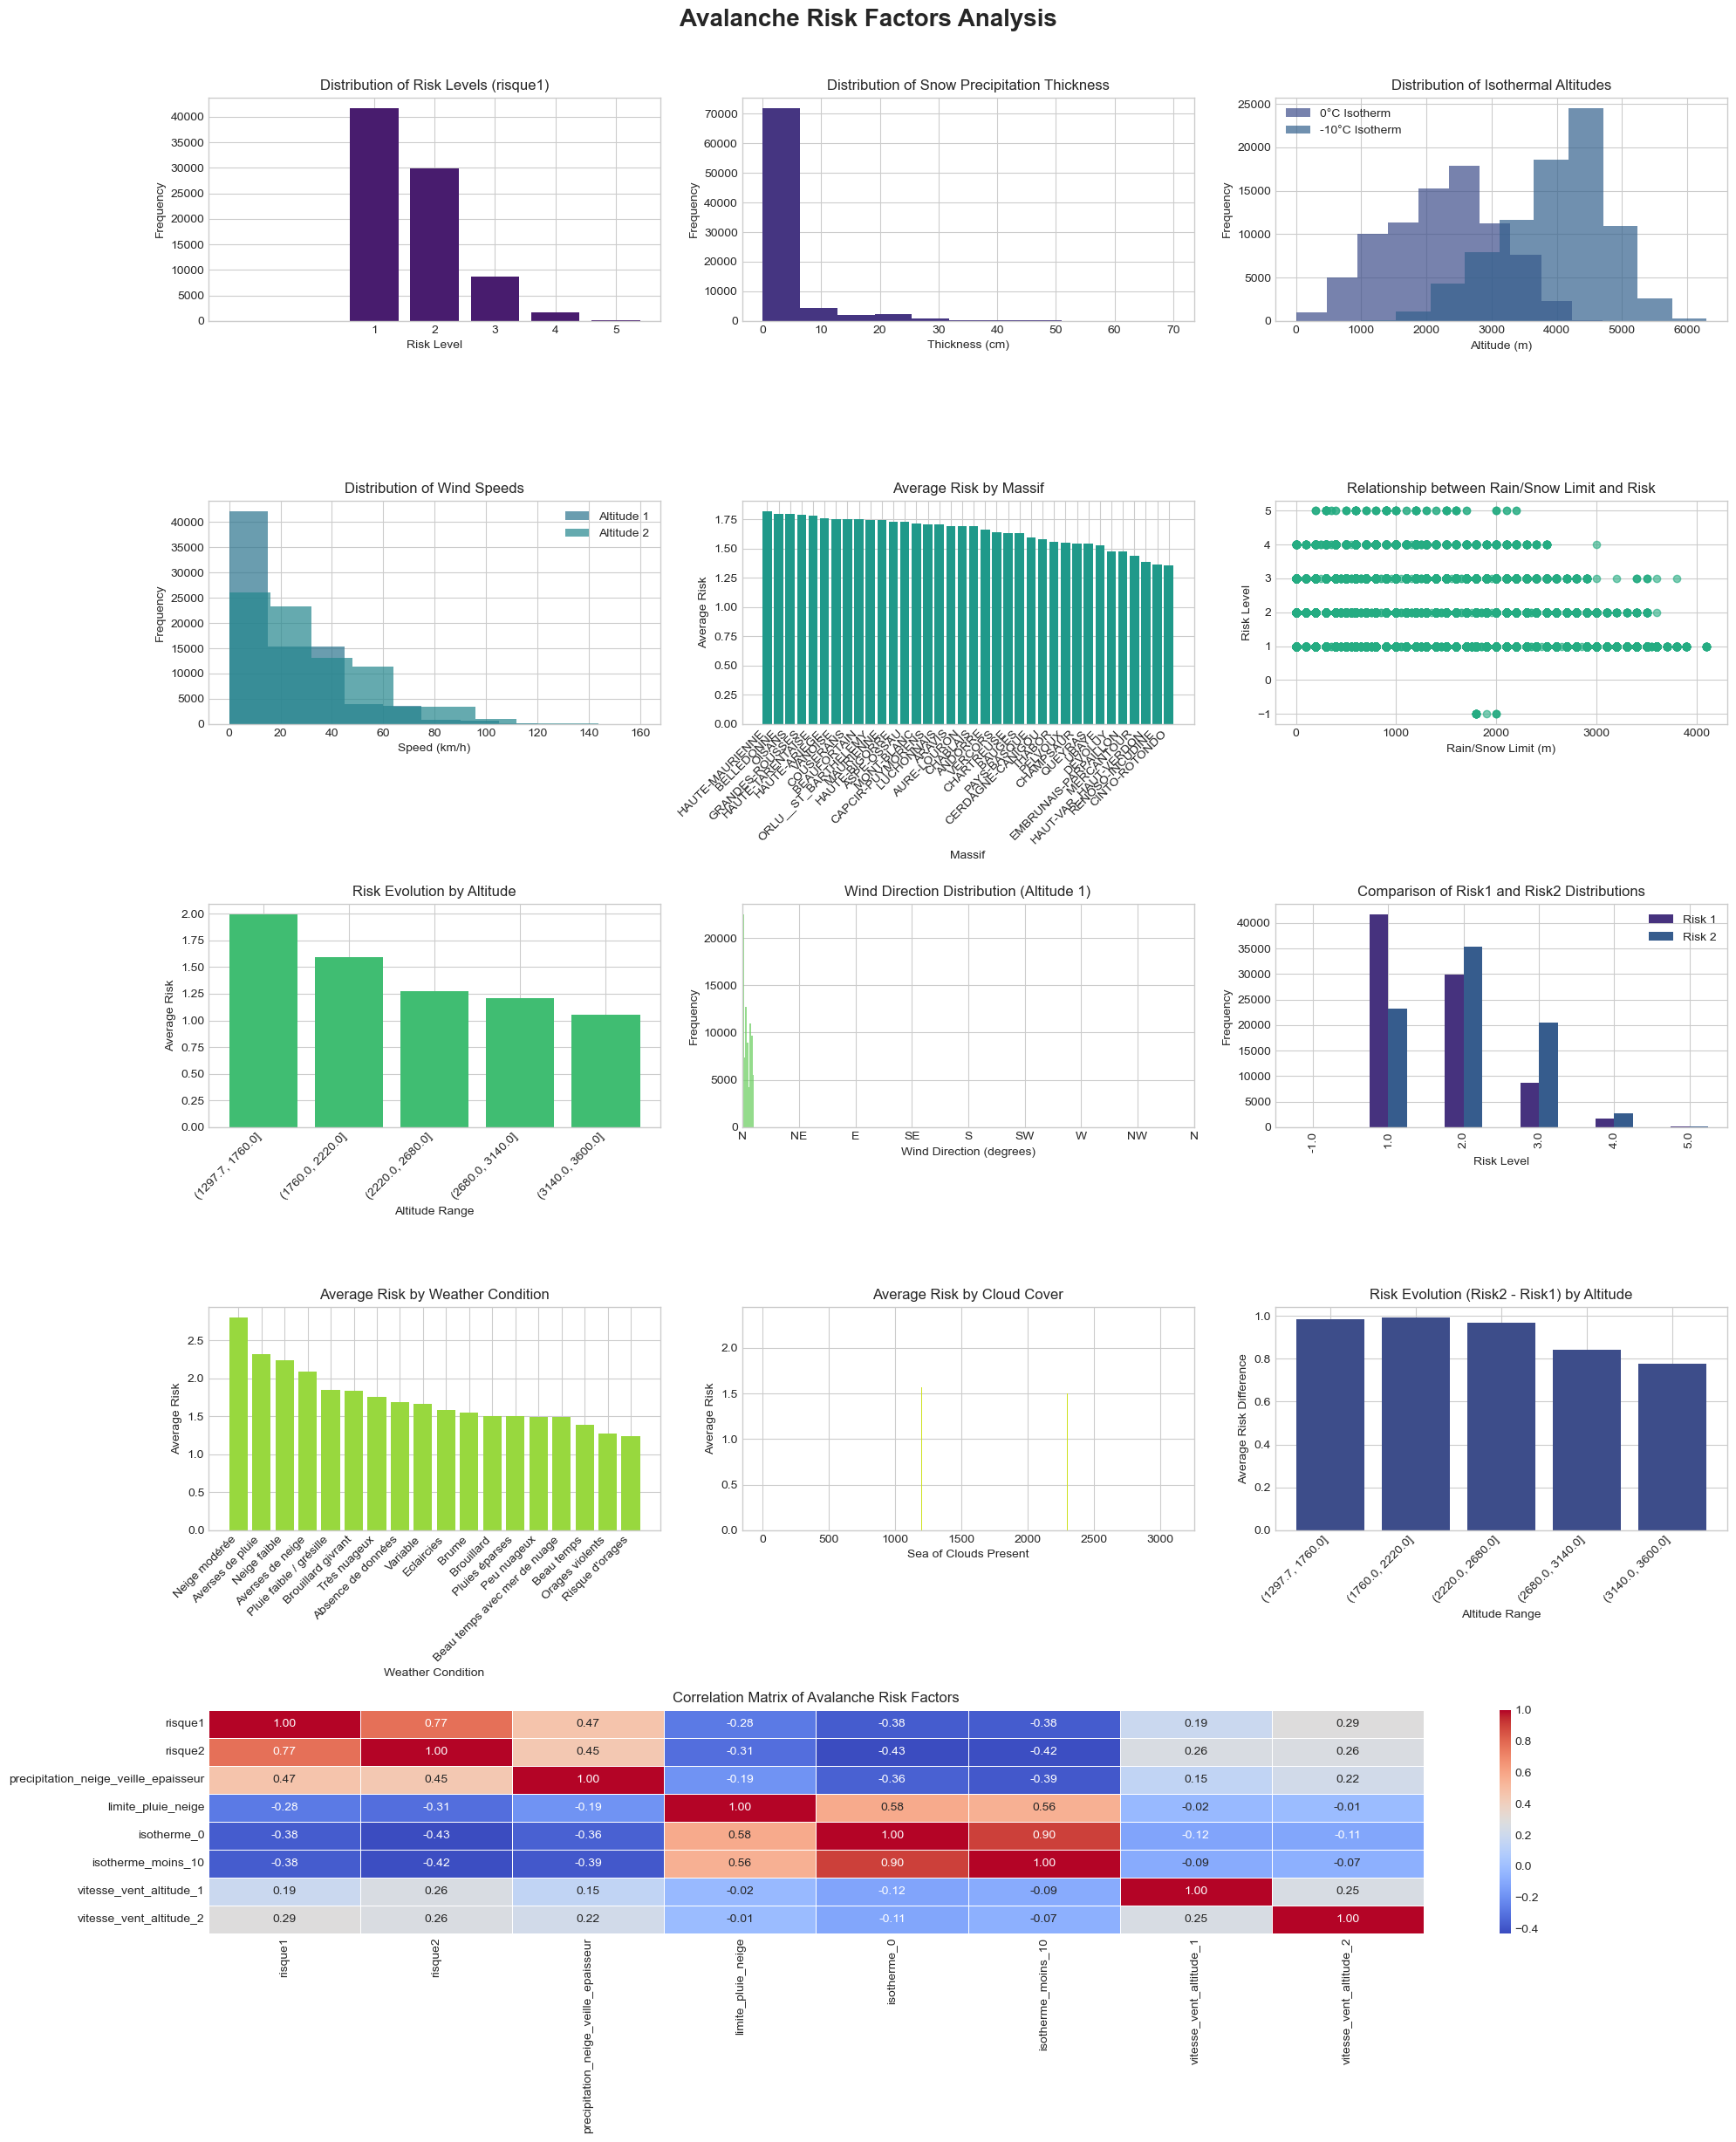

C:\Users\alice\AppData\Local\Temp\ipykernel_27816\814804665.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  snow_risk = X_df.groupby(snow_bins)['risque1'].mean()
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\814804665.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iso_risk = X_df.groupby(iso_bins)['risque1'].mean()


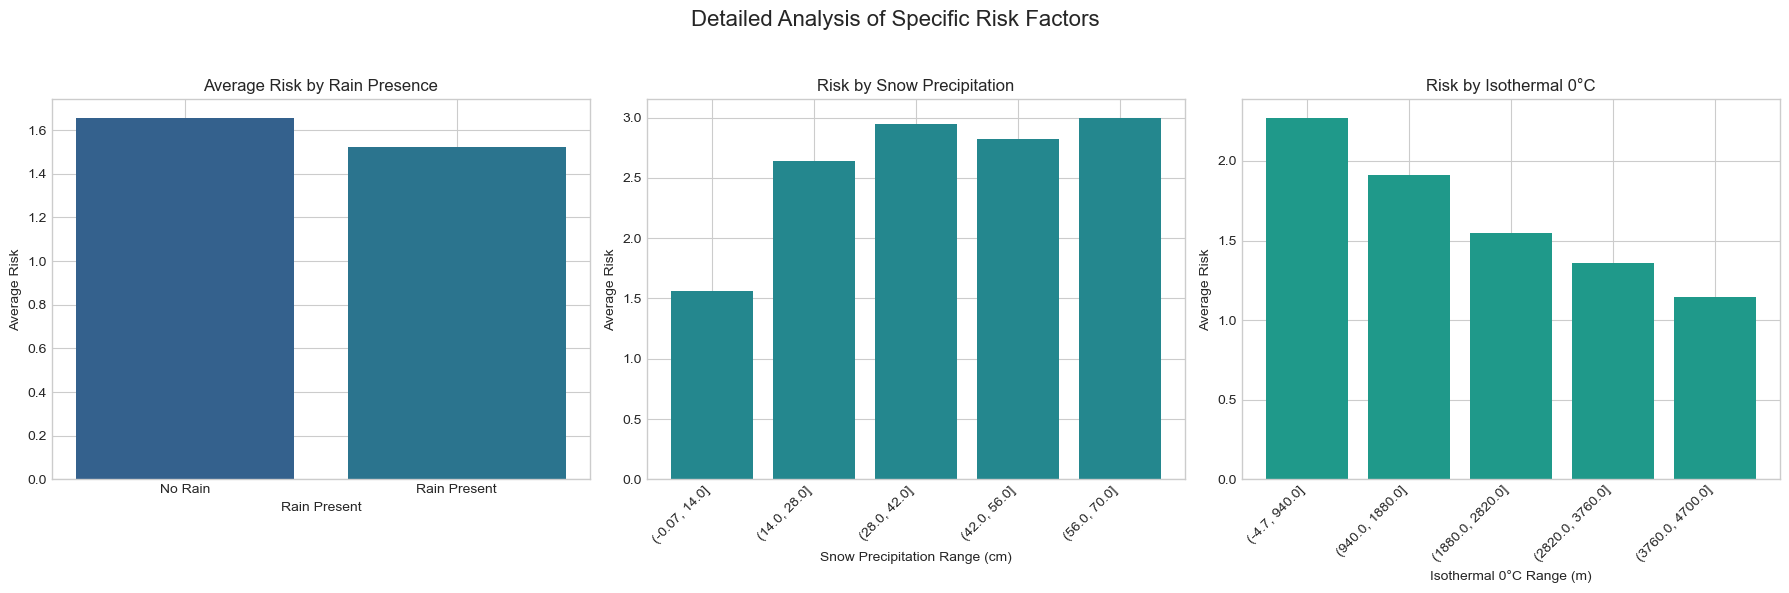

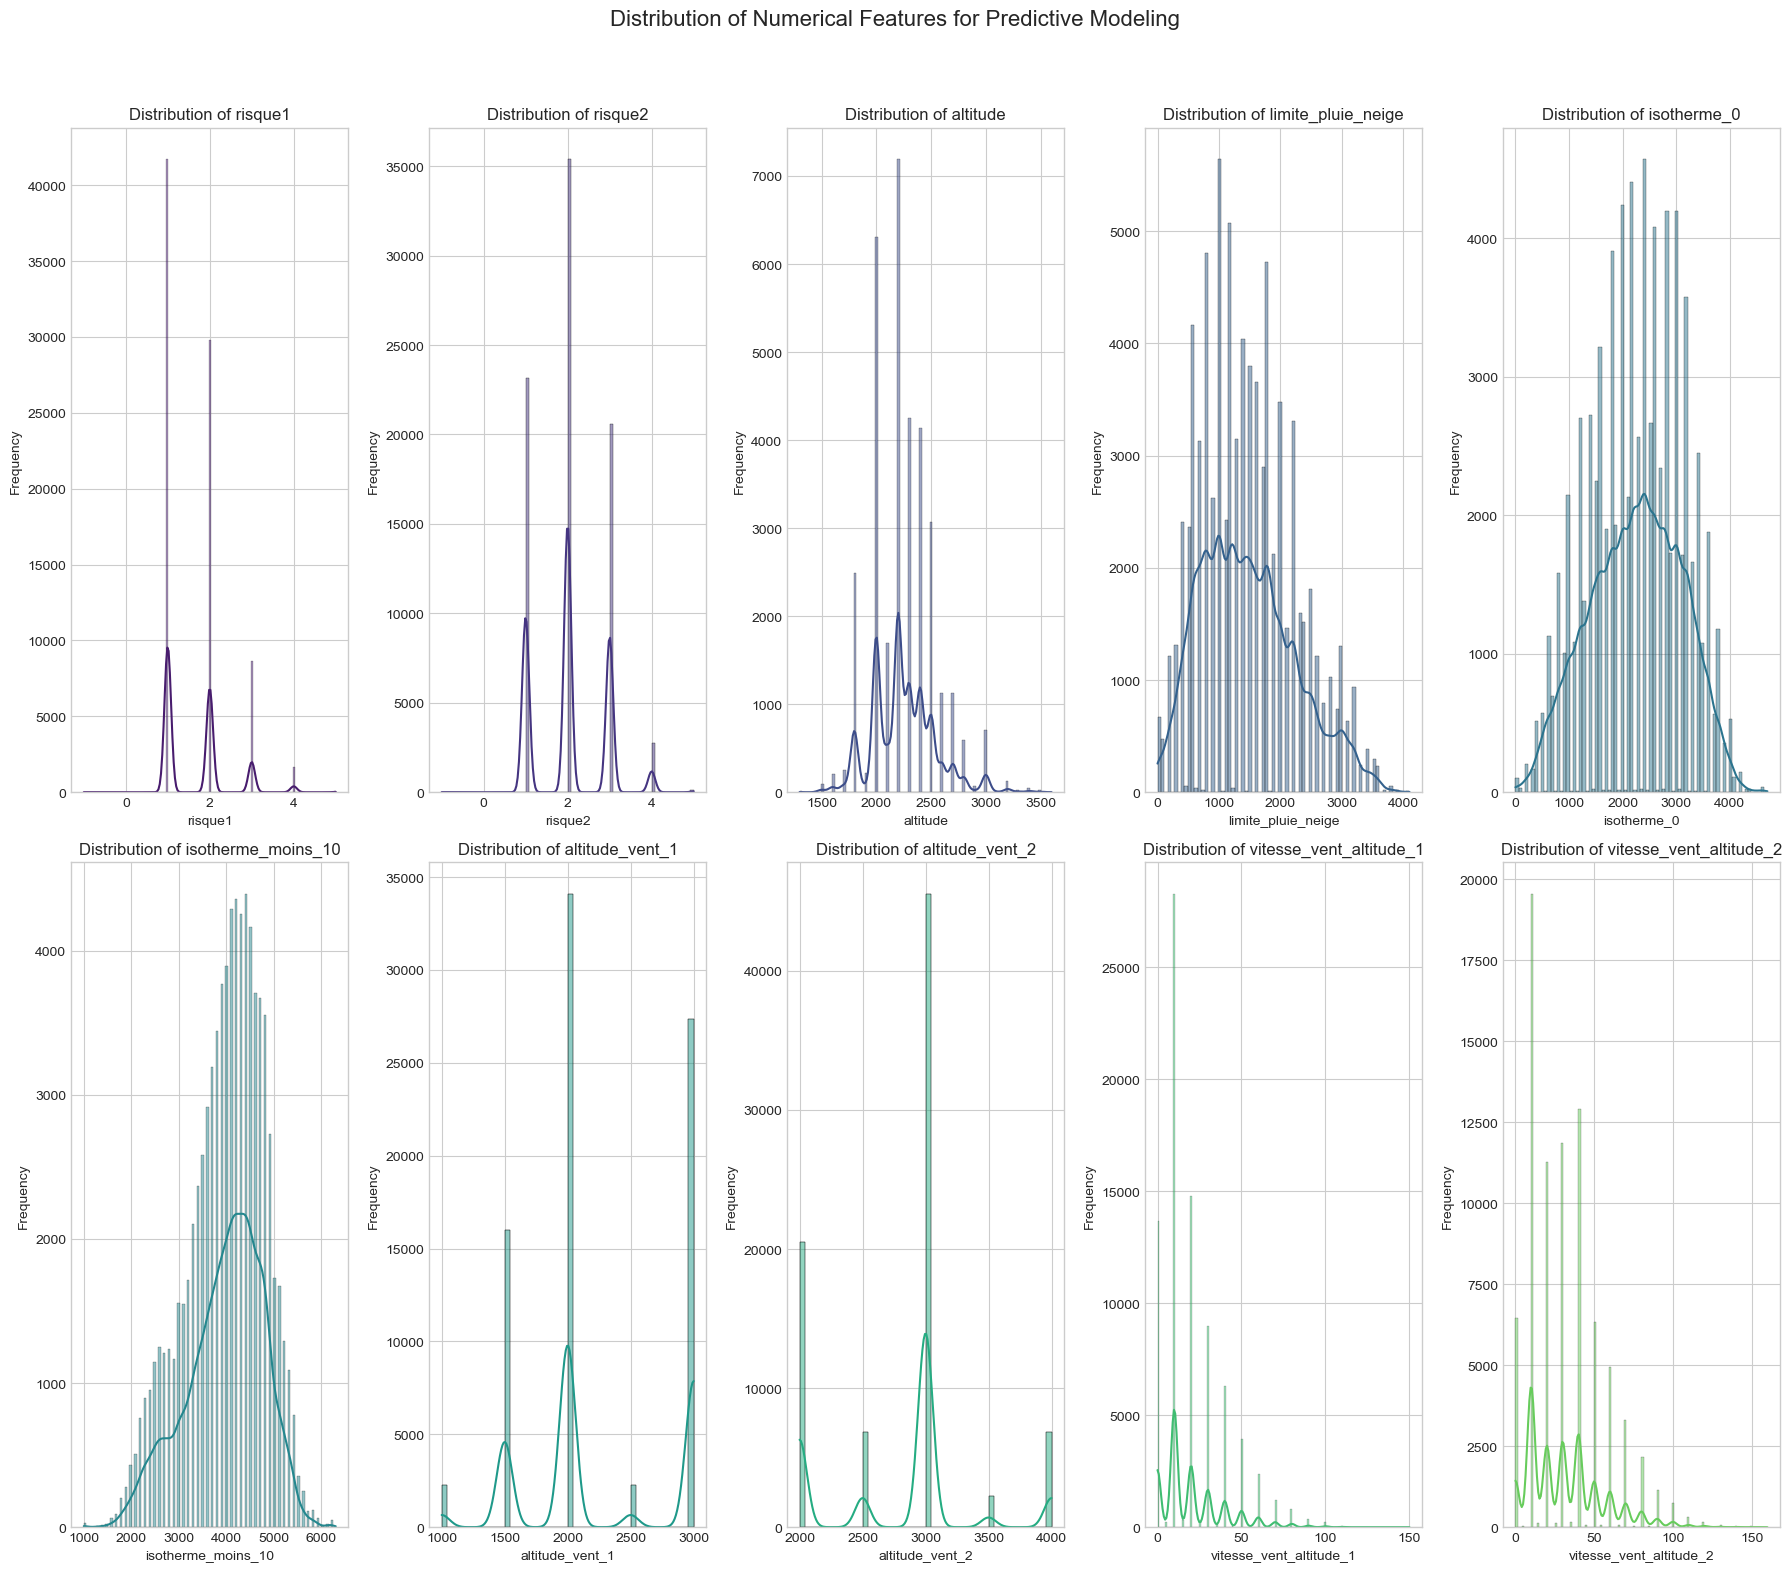

In [ ]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
colors = sns.color_palette('viridis', 12)

#################################################
# BASIC RISK ANALYSIS HISTOGRAMS
#################################################

# Create a figure with multiple subplots for basic analysis
fig = plt.figure(figsize=(20, 25))
gs = GridSpec(5, 3, figure=fig)
fig.suptitle('Avalanche Risk Factors Analysis', fontsize=20, fontweight='bold', y=0.98)

# 1. Histogram of risk levels
# This shows the distribution of primary risk levels to identify the most common ratings
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(X_df['risque1'].value_counts().index, X_df['risque1'].value_counts().values, color=colors[0])
ax1.set_title('Distribution of Risk Levels (risque1)')
ax1.set_xlabel('Risk Level')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, X_df['risque1'].max() + 1))

# 2. Histogram of snow precipitation thickness
# Helps identify how recent snowfall patterns could affect avalanche risk
ax2 = fig.add_subplot(gs[0, 1])
snow_bins = np.linspace(X_df['precipitation_neige_veille_epaisseur'].min(),
                        X_df['precipitation_neige_veille_epaisseur'].max(), 12)
ax2.hist(X_df['precipitation_neige_veille_epaisseur'], bins=snow_bins, color=colors[1])
ax2.set_title('Distribution of Snow Precipitation Thickness')
ax2.set_xlabel('Thickness (cm)')
ax2.set_ylabel('Frequency')

# 3. Histogram of isothermal altitudes
# Important for understanding temperature profiles in the snowpack
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(X_df['isotherme_0'], bins=10, color=colors[2], alpha=0.7, label='0°C Isotherm')
ax3.hist(X_df['isotherme_moins_10'], bins=10, color=colors[3], alpha=0.7, label='-10°C Isotherm')
ax3.set_title('Distribution of Isothermal Altitudes')
ax3.set_xlabel('Altitude (m)')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Histogram of wind speeds
# Wind is a critical factor in snow transport and avalanche formation
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(X_df['vitesse_vent_altitude_1'], bins=10, color=colors[4], alpha=0.7, label='Altitude 1')
ax4.hist(X_df['vitesse_vent_altitude_2'], bins=10, color=colors[5], alpha=0.7, label='Altitude 2')
ax4.set_title('Distribution of Wind Speeds')
ax4.set_xlabel('Speed (km/h)')
ax4.set_ylabel('Frequency')
ax4.legend()

# 5. Risk by massif (mountain range)
# Shows geographical distribution of risk
ax5 = fig.add_subplot(gs[1, 1])
massif_risque = X_df.groupby('massif')['risque1'].mean().sort_values(ascending=False)
ax5.bar(massif_risque.index, massif_risque.values, color=colors[6])
ax5.set_title('Average Risk by Massif')
ax5.set_xlabel('Massif')
ax5.set_ylabel('Average Risk')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 6. Relationship between rain/snow limit and risk
# Shows how precipitation type transition altitude relates to risk
ax6 = fig.add_subplot(gs[1, 2])
ax6.scatter(X_df['limite_pluie_neige'], X_df['risque1'], alpha=0.6, color=colors[7])
ax6.set_title('Relationship between Rain/Snow Limit and Risk')
ax6.set_xlabel('Rain/Snow Limit (m)')
ax6.set_ylabel('Risk Level')

#################################################
# ADDITIONAL HISTOGRAMS
#################################################

# 7. Risk evolution by altitude
# Analysis of how risk changes at different altitude bands
ax7 = fig.add_subplot(gs[2, 0])
# Create altitude bins for analysis
X_df['altitude_bins'] = pd.cut(X_df['altitude'], bins=5)
altitude_risk = X_df.groupby('altitude_bins')['risque1'].mean()
ax7.bar(altitude_risk.index.astype(str), altitude_risk.values, color=colors[8])
ax7.set_title('Risk Evolution by Altitude')
ax7.set_xlabel('Altitude Range')
ax7.set_ylabel('Average Risk')
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 8. Wind direction distribution
# Wind direction is crucial for understanding snow drift patterns
ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(X_df['direction_vent_altitude_1'], bins=8, color=colors[9], alpha=0.7)
ax8.set_title('Wind Direction Distribution (Altitude 1)')
ax8.set_xlabel('Wind Direction (degrees)')
ax8.set_ylabel('Frequency')
# Add cardinal direction markers
cardinal_dirs = {0: 'N', 45: 'NE', 90: 'E', 135: 'SE', 180: 'S', 225: 'SW', 270: 'W', 315: 'NW', 360: 'N'}
ax8.set_xticks(list(cardinal_dirs.keys()))
ax8.set_xticklabels(list(cardinal_dirs.values()))

# 9. Comparing risk1 and risk2 patterns
# This helps identify differences between primary and secondary risk assessments
ax9 = fig.add_subplot(gs[2, 2])
risk_data = pd.DataFrame({
    'Risk 1': X_df['risque1'].value_counts().sort_index(),
    'Risk 2': X_df['risque2'].value_counts().sort_index()
}).fillna(0)
risk_data.plot(kind='bar', ax=ax9)
ax9.set_title('Comparison of Risk1 and Risk2 Distributions')
ax9.set_xlabel('Risk Level')
ax9.set_ylabel('Frequency')
ax9.legend()

# 10. Analysis of risk by weather conditions
# Weather is a primary factor in avalanche formation
ax10 = fig.add_subplot(gs[3, 0])
weather_risk = X_df.groupby('temps')['risque1'].mean().sort_values(ascending=False)
ax10.bar(weather_risk.index, weather_risk.values, color=colors[10])
ax10.set_title('Average Risk by Weather Condition')
ax10.set_xlabel('Weather Condition')
ax10.set_ylabel('Average Risk')
plt.setp(ax10.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 11. Cloud cover analysis (sea of clouds presence)
# Cloud cover affects radiation and temperature patterns
ax11 = fig.add_subplot(gs[3, 1])
cloud_risk = X_df.groupby('mer_de_nuages')['risque1'].mean()
ax11.bar(cloud_risk.index, cloud_risk.values, color=colors[11])
ax11.set_title('Average Risk by Cloud Cover')
ax11.set_xlabel('Sea of Clouds Present')
ax11.set_ylabel('Average Risk')

# 12. Risk evolution analysis for different altitude bands
# This shows how risk1 and risk2 differ at various altitudes
ax12 = fig.add_subplot(gs[3, 2])
X_df['risk_diff'] = X_df['risque2'] - X_df['risque1']
altitude_diff = X_df.groupby('altitude_bins')['risk_diff'].mean()
ax12.bar(altitude_diff.index.astype(str), altitude_diff.values, color=colors[2])
ax12.set_title('Risk Evolution (Risk2 - Risk1) by Altitude')
ax12.set_xlabel('Altitude Range')
ax12.set_ylabel('Average Risk Difference')
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=45, ha='right')

#################################################
# ADVANCED ANALYSIS
#################################################

# 13. Correlation matrix between numerical variables
# Shows how different factors relate to each other
columns_to_correlate = [
    'risque1', 'risque2', 'precipitation_neige_veille_epaisseur',
    'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
    'vitesse_vent_altitude_1', 'vitesse_vent_altitude_2'
]

ax13 = fig.add_subplot(gs[4, :])
correlation = X_df[columns_to_correlate].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax13)
ax13.set_title('Correlation Matrix of Avalanche Risk Factors')

plt.tight_layout(rect=[0, 0, 1, 0.97])
# plt.savefig('avalanche_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#################################################
# TEMPORAL ANALYSIS (if date column exists)
#################################################

if 'date' in X_df.columns:
    # Convert to datetime if not already
    X_df['date'] = pd.to_datetime(X_df['date'])
    X_df['month'] = X_df['date'].dt.month
    X_df['day'] = X_df['date'].dt.day

    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Temporal Analysis of Avalanche Risk', fontsize=16)

    # 14. Monthly risk evolution
    # Shows seasonal patterns in avalanche risk
    monthly_risk = X_df.groupby('month')['risque1'].mean()
    axes[0, 0].bar(monthly_risk.index, monthly_risk.values, color=colors[0])
    axes[0, 0].set_title('Average Risk by Month')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Average Risk')
    axes[0, 0].set_xticks(range(1, 13))
    axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # 15. Monthly precipitation patterns
    # Shows how snowfall varies throughout the season
    monthly_snow = X_df.groupby('month')['precipitation_neige_veille_epaisseur'].mean()
    axes[0, 1].bar(monthly_snow.index, monthly_snow.values, color=colors[1])
    axes[0, 1].set_title('Average Snow Precipitation by Month')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Average Precipitation (cm)')
    axes[0, 1].set_xticks(range(1, 13))
    axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # 16. Risk distribution by day of month
    # Can help identify if there are any patterns within months
    daily_risk = X_df.groupby('day')['risque1'].mean()
    axes[1, 0].plot(daily_risk.index, daily_risk.values, 'o-', color=colors[2])
    axes[1, 0].set_title('Average Risk by Day of Month')
    axes[1, 0].set_xlabel('Day')
    axes[1, 0].set_ylabel('Average Risk')

    # 17. Risk and precipitation relationship over time
    # Time series showing how risk and precipitation correlate
    time_data = X_df.sort_values('date').set_index('date')
    ax2 = axes[1, 1].twinx()
    axes[1, 1].plot(time_data.index, time_data['risque1'].rolling(7).mean(), 'b-', label='7-day Avg Risk')
    ax2.plot(time_data.index, time_data['precipitation_neige_veille_epaisseur'].rolling(7).mean(), 'r-', label='7-day Avg Snow')
    axes[1, 1].set_title('Risk and Precipitation Time Series')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Average Risk', color='b')
    ax2.set_ylabel('Average Precipitation (cm)', color='r')
    lines1, labels1 = axes[1, 1].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[1, 1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.savefig('temporal_analysis.png', dpi=300)
    plt.show()

#################################################
# SPECIFIC RISK FACTOR ANALYSIS
#################################################

# Create another set of detailed histograms for specific analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes
fig.suptitle('Detailed Analysis of Specific Risk Factors', fontsize=16)

# 18. Rain presence analysis
# Shows how risk differs when rain is present vs. absent
# Rain can significantly destabilize the snowpack
rain_risk = X_df.groupby('is_pluie')['risque1'].mean()
axes[0].bar(['No Rain', 'Rain Present'], rain_risk.values, color=[colors[3], colors[4]])
axes[0].set_title('Average Risk by Rain Presence')
axes[0].set_xlabel('Rain Present')
axes[0].set_ylabel('Average Risk')

# 19. Risk evolution with snow precipitation thickness
snow_bins = pd.cut(X_df['precipitation_neige_veille_epaisseur'], bins=5)
snow_risk = X_df.groupby(snow_bins)['risque1'].mean()
axes[1].bar(snow_risk.index.astype(str), snow_risk.values, color=colors[5])
axes[1].set_title('Risk by Snow Precipitation')
axes[1].set_xlabel('Snow Precipitation Range (cm)')
axes[1].set_ylabel('Average Risk')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 20. Risk distribution by isotherme_0
iso_bins = pd.cut(X_df['isotherme_0'], bins=5)
iso_risk = X_df.groupby(iso_bins)['risque1'].mean()
axes[2].bar(iso_risk.index.astype(str), iso_risk.values, color=colors[6])
axes[2].set_title('Risk by Isothermal 0°C')
axes[2].set_xlabel('Isothermal 0°C Range (m)')
axes[2].set_ylabel('Average Risk')
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#################################################
# DATA PREPARATION FOR PREDICTIVE MODELING
#################################################

# This section prepares features for machine learning by analyzing distributions
# These histograms help assess feature quality and transformations needed

# 22. Distribution of numerical features for modeling
numeric_cols = [
    'risque1', 'risque2', 'altitude',
    'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
    'altitude_vent_1', 'altitude_vent_2',
    'vitesse_vent_altitude_1', 'vitesse_vent_altitude_2'
]

fig, axes = plt.subplots(2, 5, figsize=(18, 16))
fig.suptitle('Distribution of Numerical Features for Predictive Modeling', fontsize=16)

for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, 5)
    # Plot histogram with kernel density estimate
    sns.histplot(X_df[col], kde=True, ax=axes[row, col_idx], color=colors[i % len(colors)])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

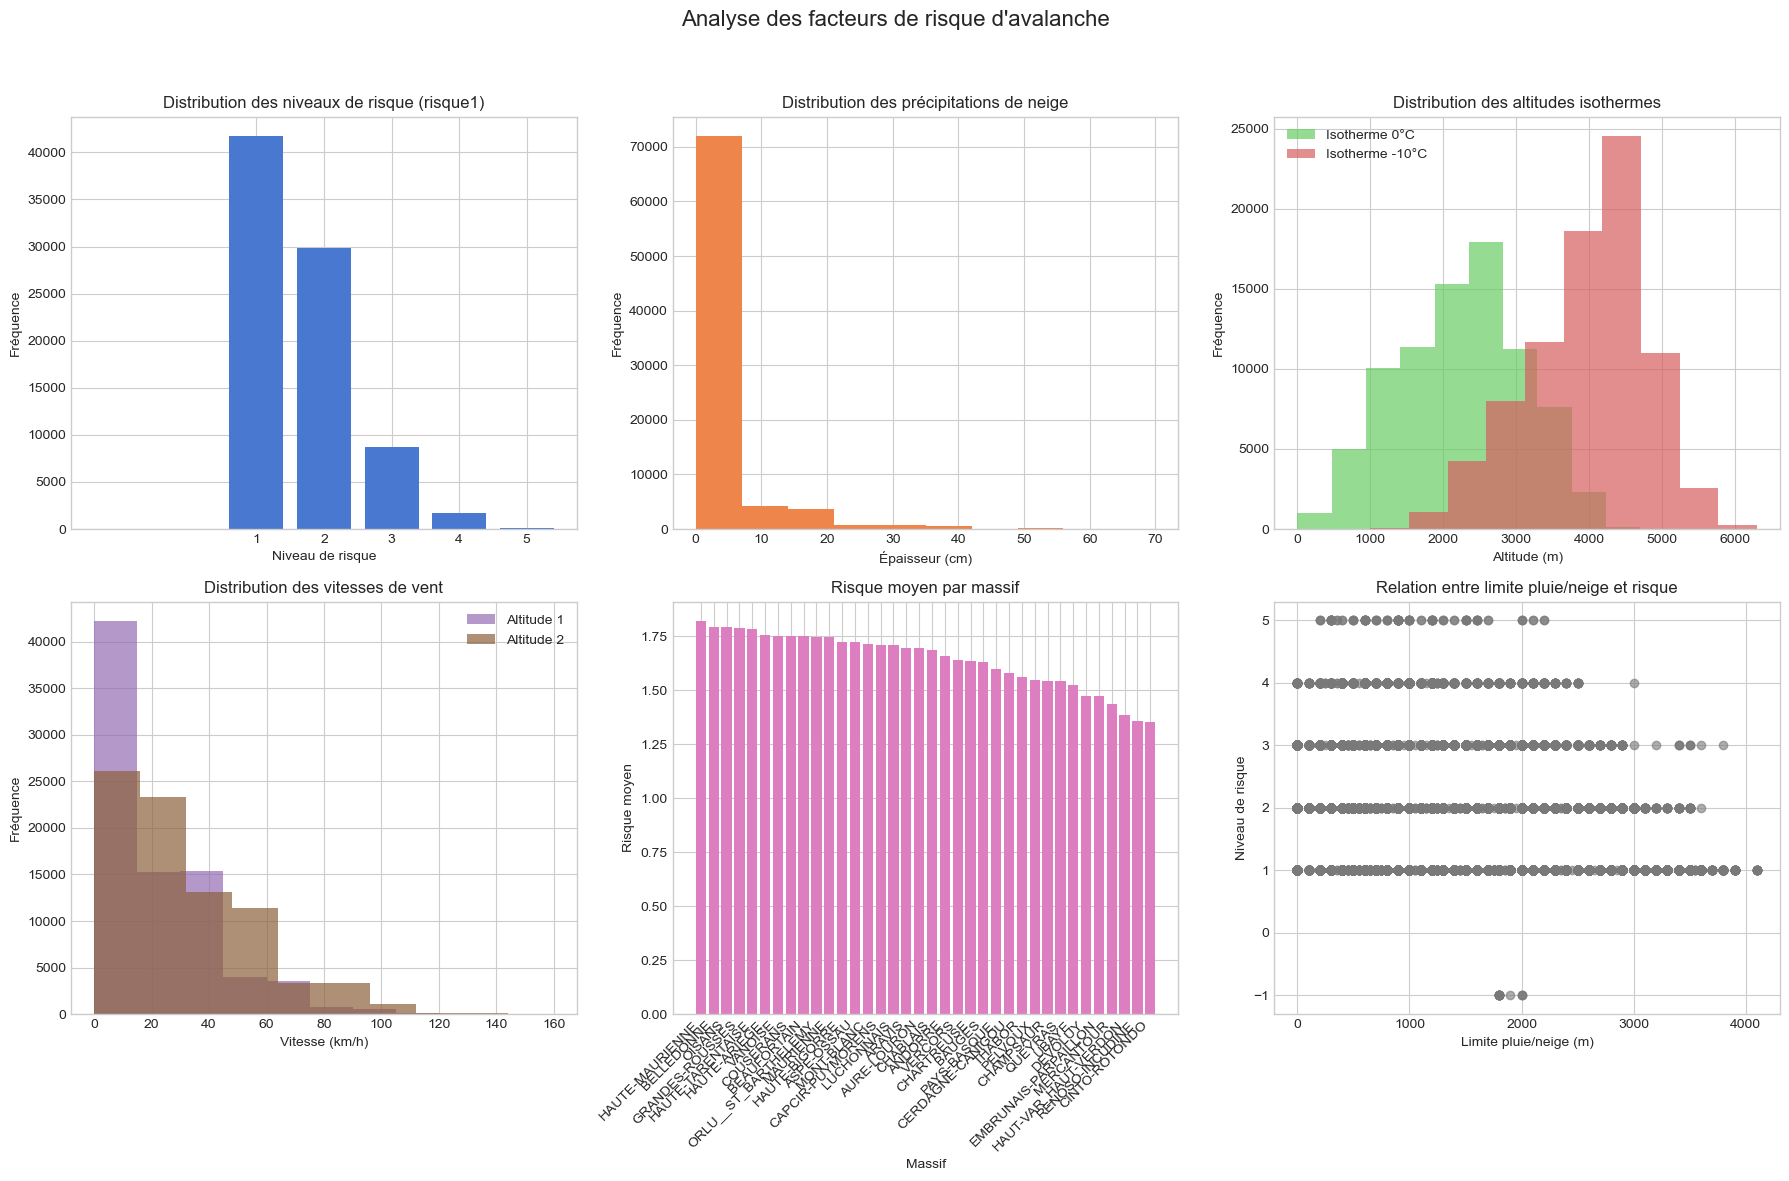

<Figure size 1200x600 with 0 Axes>

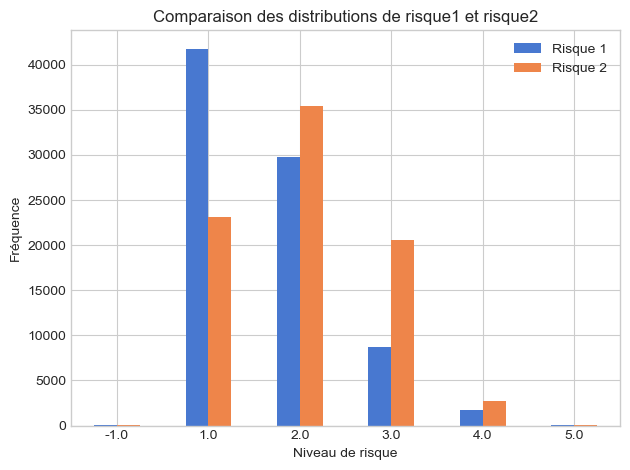

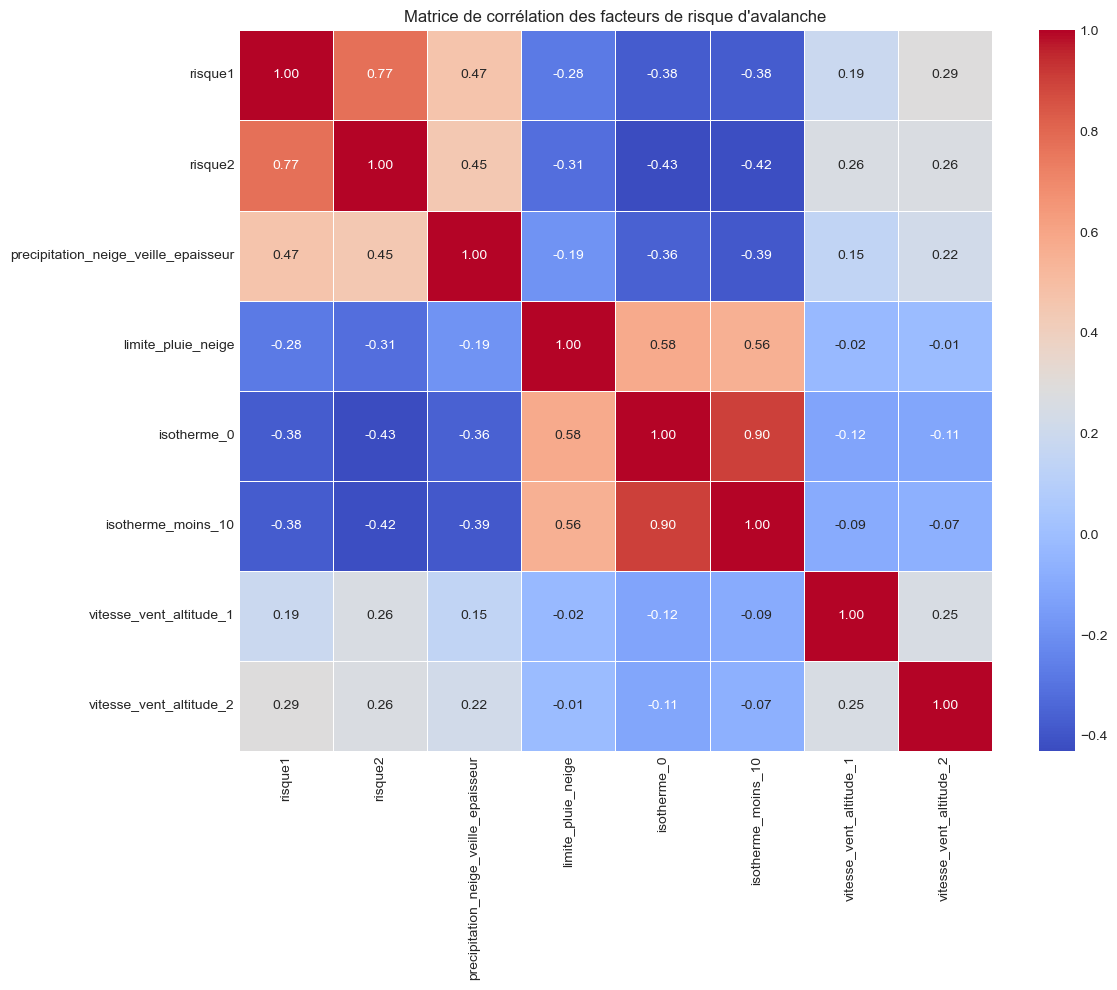

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('muted')
colors = sns.color_palette('muted')

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analyse des facteurs de risque d\'avalanche', fontsize=16)

# 1. Histogramme des niveaux de risque
axes[0, 0].bar(X_df['risque1'].value_counts().index, X_df['risque1'].value_counts().values, color=colors[0])
axes[0, 0].set_title('Distribution des niveaux de risque (risque1)')
axes[0, 0].set_xlabel('Niveau de risque')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_xticks(np.arange(1, X_df['risque1'].max() + 1))

# 2. Histogramme des épaisseurs de neige
axes[0, 1].hist(X_df['precipitation_neige_veille_epaisseur'], bins=10, color=colors[1])
axes[0, 1].set_title('Distribution des précipitations de neige')
axes[0, 1].set_xlabel('Épaisseur (cm)')
axes[0, 1].set_ylabel('Fréquence')

# 3. Histogramme des altitudes isothermes
axes[0, 2].hist(X_df['isotherme_0'], bins=10, color=colors[2], alpha=0.7, label='Isotherme 0°C')
axes[0, 2].hist(X_df['isotherme_moins_10'], bins=10, color=colors[3], alpha=0.7, label='Isotherme -10°C')
axes[0, 2].set_title('Distribution des altitudes isothermes')
axes[0, 2].set_xlabel('Altitude (m)')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].legend()

# 4. Histogramme des vitesses de vent
axes[1, 0].hist(X_df['vitesse_vent_altitude_1'], bins=10, color=colors[4], alpha=0.7, label='Altitude 1')
axes[1, 0].hist(X_df['vitesse_vent_altitude_2'], bins=10, color=colors[5], alpha=0.7, label='Altitude 2')
axes[1, 0].set_title('Distribution des vitesses de vent')
axes[1, 0].set_xlabel('Vitesse (km/h)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].legend()

# 5. Distribution des risques par massif
massif_risque = X_df.groupby('massif')['risque1'].mean().sort_values(ascending=False)
axes[1, 1].bar(massif_risque.index, massif_risque.values, color=colors[6])
axes[1, 1].set_title('Risque moyen par massif')
axes[1, 1].set_xlabel('Massif')
axes[1, 1].set_ylabel('Risque moyen')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 6. Corrélation entre limite pluie/neige et risque
axes[1, 2].scatter(X_df['limite_pluie_neige'], X_df['risque1'], alpha=0.6, color=colors[7])
axes[1, 2].set_title('Relation entre limite pluie/neige et risque')
axes[1, 2].set_xlabel('Limite pluie/neige (m)')
axes[1, 2].set_ylabel('Niveau de risque')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('visualisation/analyse_avalanches.png', dpi=300)
plt.show()

# Créer un histogramme plus détaillé pour les niveaux de risque
plt.figure(figsize=(12, 6))
risk_data = pd.DataFrame({
    'Risque 1': X_df['risque1'].value_counts().sort_index(),
    'Risque 2': X_df['risque2'].value_counts().sort_index()
})
risk_data.plot(kind='bar')
plt.title('Comparaison des distributions de risque1 et risque2')
plt.xlabel('Niveau de risque')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig('visualisation/comparaison_risques.png', dpi=300)
plt.show()

# Analyse des corrélations entre variables numériques
columns_to_correlate = [
    'risque1', 'risque2', 'precipitation_neige_veille_epaisseur',
    'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
    'vitesse_vent_altitude_1', 'vitesse_vent_altitude_2'
]

plt.figure(figsize=(12, 10))
correlation = X_df[columns_to_correlate].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des facteurs de risque d\'avalanche')
plt.tight_layout()
plt.savefig('visualisation/correlation_facteurs.png', dpi=300)
plt.show()

# Analyse temporelle si applicable
if 'date' in X_df.columns:
    X_df['date'] = pd.to_datetime(X_df['date'])
    X_df['mois'] = X_df['date'].dt.month

    plt.figure(figsize=(12, 6))
    monthly_risk = X_df.groupby('mois')['risque1'].mean()
    monthly_risk.plot(kind='bar', color=colors[8])
    plt.title('Évolution du risque moyen par mois')
    plt.xlabel('Mois')
    plt.ylabel('Risque moyen')
    plt.xticks(range(12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
    plt.tight_layout()
    plt.savefig('evolution_temporelle.png', dpi=300)
    plt.show()

In [ ]:
data.describe()

,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,vitesse_vent_altitude_1,vitesse_vent_altitude_2,is_pluie,no_mer_de_nuages,risque_maxi
count,11025.000000,2799.000000,33795.000000,81999.000000,81999.000000,81999.0,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000
mean,2.337687,2.645230,2247.536618,1.641313,2.038927,1800.0,2.553177,32.251918,1461.328187,2248.182295,3980.458298,2222.551495,2805.235430,20.437749,31.554104,0.123111,0.967585,2.165222
std,0.595230,0.720057,284.529517,0.762309,0.824541,0.0,6.446649,229.580003,771.516267,852.582664,811.239360,606.533468,568.908987,18.943829,23.779349,0.328567,0.177101,0.806580
min,1.000000,1.000000,1300.000000,-1.000000,-1.000000,1800.0,0.000000,-1.000000,0.000000,0.000000,1000.000000,1000.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2000.000000,1.000000,1.000000,1800.0,0.000000,0.000000,800.000000,1600.000000,3500.000000,2000.000000,2000.000000,10.000000,10.000000,0.000000,1.000000,2.000000
50%,2.000000,3.000000,2200.000000,1.000000,2.000000,1800.0,0.000000,0.000000,1400.000000,2300.000000,4100.000000,2000.000000,3000.000000,10.000000,30.000000,0.000000,1.000000,2.000000
75%,3.000000,3.000000,2400.000000,2.000000,3.000000,1800.0,1.000000,0.000000,2000.000000,2900.000000,4600.000000,3000.000000,3000.000000,30.000000,40.000000,0.000000,1.000000,3.000000
max,5.000000,4.000000,3600.000000,5.000000,5.000000,1800.0,70.000000,3100.000000,4100.000000,4700.000000,6300.000000,3000.000000,4000.000000,150.000000,160.000000,1.000000,1.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81999 entries, 2018-12-18 00:00:00 to 2023-06-09 12:00:00
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   massif                                81999 non-null  object 
 1   evolurisque1                          11025 non-null  float64
 2   evolurisque2                          2799 non-null   float64
 3   altitude                              33795 non-null  float64
 4   risque1                               81999 non-null  float64
 5   risque2                               81999 non-null  float64
 6   precipitation_neige_veille_altitude   81999 non-null  float64
 7   precipitation_neige_veille_epaisseur  81999 non-null  float64
 8   temps                                 81999 non-null  object 
 9   mer_de_nuages                         81999 non-null  int64  
 10  limite_pluie_neige                    81999 non

It was mentioned that the dataset contained **47 features**, but after preprocessing, we now have only **21 features**. This reduction in the number of features is primarily due to **data cleaning, transformation, and feature selection** processes that were applied to refine the dataset and improve model performance.

One major reason for the decrease in features is **redundancy removal**. Initially, the dataset contained multiple records per day for each massif, with data recorded at **00:00, 06:00, and 12:00**. During preprocessing, these records were likely **aggregated** to retain only the most relevant information per day, thereby reducing the number of time-dependent features. Additionally, some features, such as `massif`, were removed when working with individual massifs like **Vanoise**, as they became redundant after filtering the dataset by region.

Another significant factor is **feature selection based on correlation with the target variable** (`risque_maxi`). 

In summary, the decrease in feature count from **47 to 21** resulted from **filtering, transformation, and feature selection** steps aimed at improving the dataset’s efficiency.

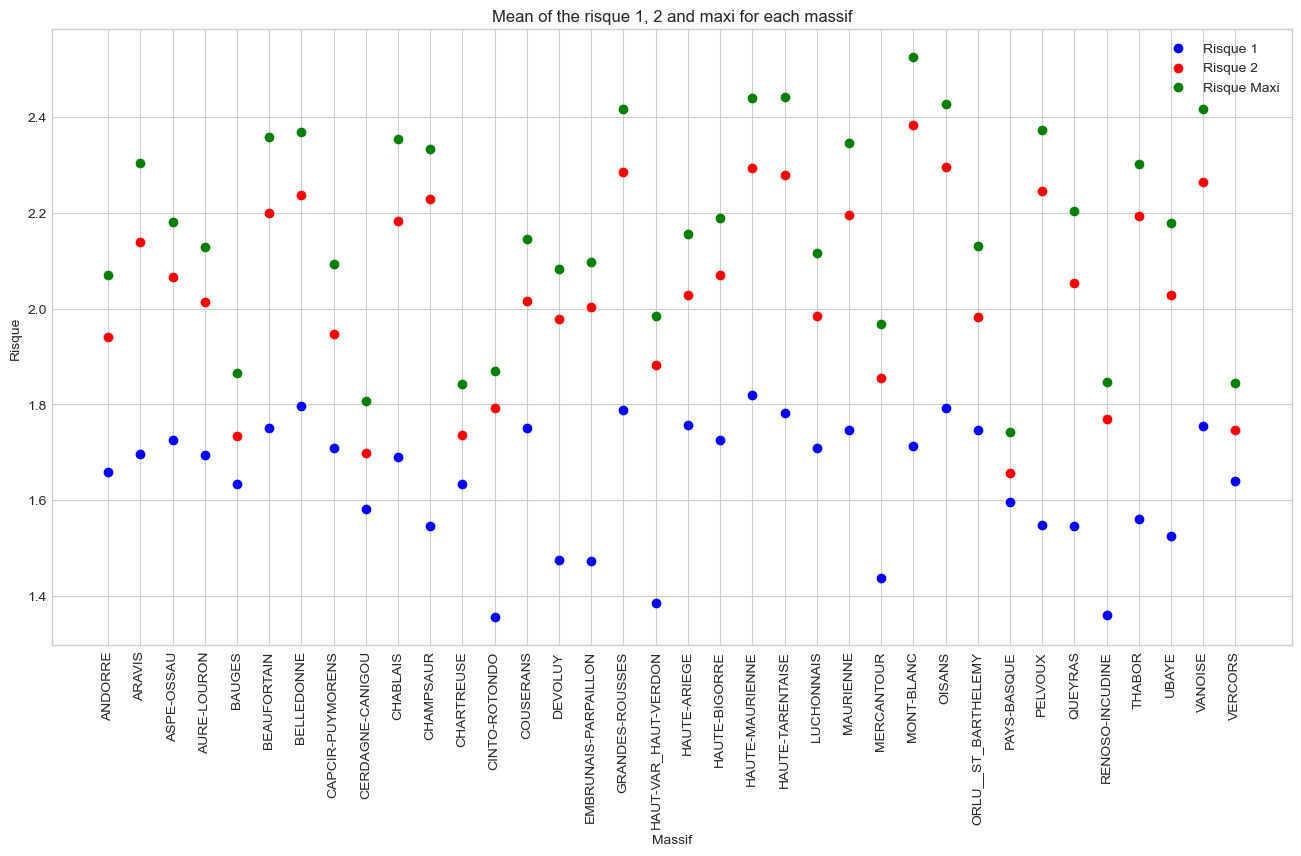

In [25]:
data_massif = data.groupby('massif')
massifs = data['massif'].unique()

# Plot the mean of the target variable for each massif and the risque 2 variable
plt.figure(figsize=(16,8))
plt.scatter(massifs, data_massif['risque1'].mean(), c='b')
plt.scatter(massifs, data_massif['risque2'].mean(), c='r')
plt.scatter(massifs, data_massif['risque_maxi'].mean(), c='g')
plt.xticks(rotation=90)
plt.xlabel('Massif')
plt.ylabel('Risque')
plt.legend(['Risque 1', 'Risque 2', 'Risque Maxi'])
plt.title('Mean of the risque 1, 2 and maxi for each massif')
plt.grid(True)
plt.show()

### Create a time series plot of the risk levels

The date is not unique so we will have to group by massif and then date to plot the risk levels over time.

In [74]:
df_massifs = {massif: data[data['massif'] == massif] for massif in massifs}

In [75]:
df_massifs['VANOISE'].head()

,massif,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,temps,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,direction_vent_altitude_1,vitesse_vent_altitude_1,direction_vent_altitude_2,vitesse_vent_altitude_2,is_pluie,no_mer_de_nuages,risque_maxi
date,,,,,,,,,,,,,,,,,,,,,,
2018-12-17 00:00:00,VANOISE,NaN,NaN,2400.0,2.0,3.0,1800.0,10.0,Neige modérée,0,1200.0,1500.0,3000.0,3000.0,4000.0,NW,20.0,NW,30.0,0,1,3.0
2018-12-17 06:00:00,VANOISE,NaN,NaN,2400.0,2.0,3.0,1800.0,10.0,Neige faible,0,1000.0,1100.0,2700.0,3000.0,4000.0,NW,30.0,NW,60.0,0,1,3.0
2018-12-17 12:00:00,VANOISE,NaN,NaN,2400.0,2.0,3.0,1800.0,10.0,Variable,0,1000.0,1100.0,2600.0,3000.0,4000.0,NW,30.0,NW,50.0,0,1,3.0
2018-12-18 00:00:00,VANOISE,NaN,NaN,2400.0,2.0,3.0,1800.0,3.0,Beau temps,0,1000.0,1900.0,3900.0,3000.0,4000.0,NW,10.0,NW,50.0,0,1,3.0
2018-12-18 06:00:00,VANOISE,NaN,NaN,2400.0,2.0,3.0,1800.0,3.0,Beau temps,0,1000.0,2200.0,4000.0,3000.0,4000.0,W,10.0,NW,30.0,0,1,3.0


In [76]:
for massif, df in df_massifs.items():
    df.fillna(method='ffill', inplace=True)

    if df.isna().sum().sum() > 0:
        df.fillna(method='bfill', inplace=True)

C:\Users\alice\AppData\Local\Temp\ipykernel_27816\3082417674.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\3082417674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\3082417674.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_27816\3082417674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

## Some plots

In [77]:
df_massifs['VANOISE'].columns

Index(['massif', 'evolurisque1', 'evolurisque2', 'altitude', 'risque1',
       'risque2', 'precipitation_neige_veille_altitude',
       'precipitation_neige_veille_epaisseur', 'temps', 'mer_de_nuages',
       'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
       'altitude_vent_1', 'altitude_vent_2', 'direction_vent_altitude_1',
       'vitesse_vent_altitude_1', 'direction_vent_altitude_2',
       'vitesse_vent_altitude_2', 'is_pluie', 'no_mer_de_nuages',
       'risque_maxi'],
      dtype='object')

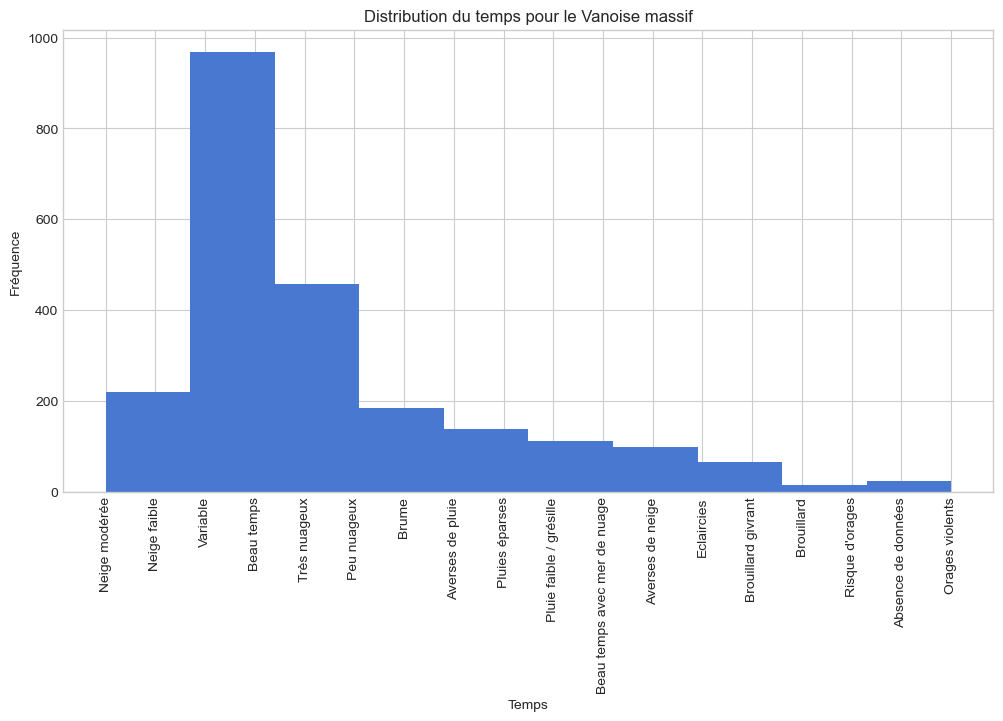

In [78]:
plt.figure(figsize=(12,6))
df_massifs['VANOISE']['temps'].hist()
plt.xlabel('Temps')
plt.ylabel('Fréquence')
plt.title('Distribution du temps pour le Vanoise massif')
plt.xticks(rotation=90)
plt.show()

## Correlation matrix across the massifs and the mean correlation

In [79]:
df_massifs['VANOISE'].columns

Index(['massif', 'evolurisque1', 'evolurisque2', 'altitude', 'risque1',
       'risque2', 'precipitation_neige_veille_altitude',
       'precipitation_neige_veille_epaisseur', 'temps', 'mer_de_nuages',
       'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
       'altitude_vent_1', 'altitude_vent_2', 'direction_vent_altitude_1',
       'vitesse_vent_altitude_1', 'direction_vent_altitude_2',
       'vitesse_vent_altitude_2', 'is_pluie', 'no_mer_de_nuages',
       'risque_maxi'],
      dtype='object')

massif                                  2280
evolurisque1                            2280
evolurisque2                            2280
altitude                                2280
risque1                                 2280
risque2                                 2280
precipitation_neige_veille_altitude     2280
precipitation_neige_veille_epaisseur    2280
temps                                   2280
mer_de_nuages                           2280
limite_pluie_neige                      2280
isotherme_0                             2280
isotherme_moins_10                      2280
altitude_vent_1                         2280
altitude_vent_2                         2280
direction_vent_altitude_1               2280
vitesse_vent_altitude_1                 2280
direction_vent_altitude_2               2280
vitesse_vent_altitude_2                 2280
is_pluie                                2280
no_mer_de_nuages                        2280
risque_maxi                             2280
dtype: int

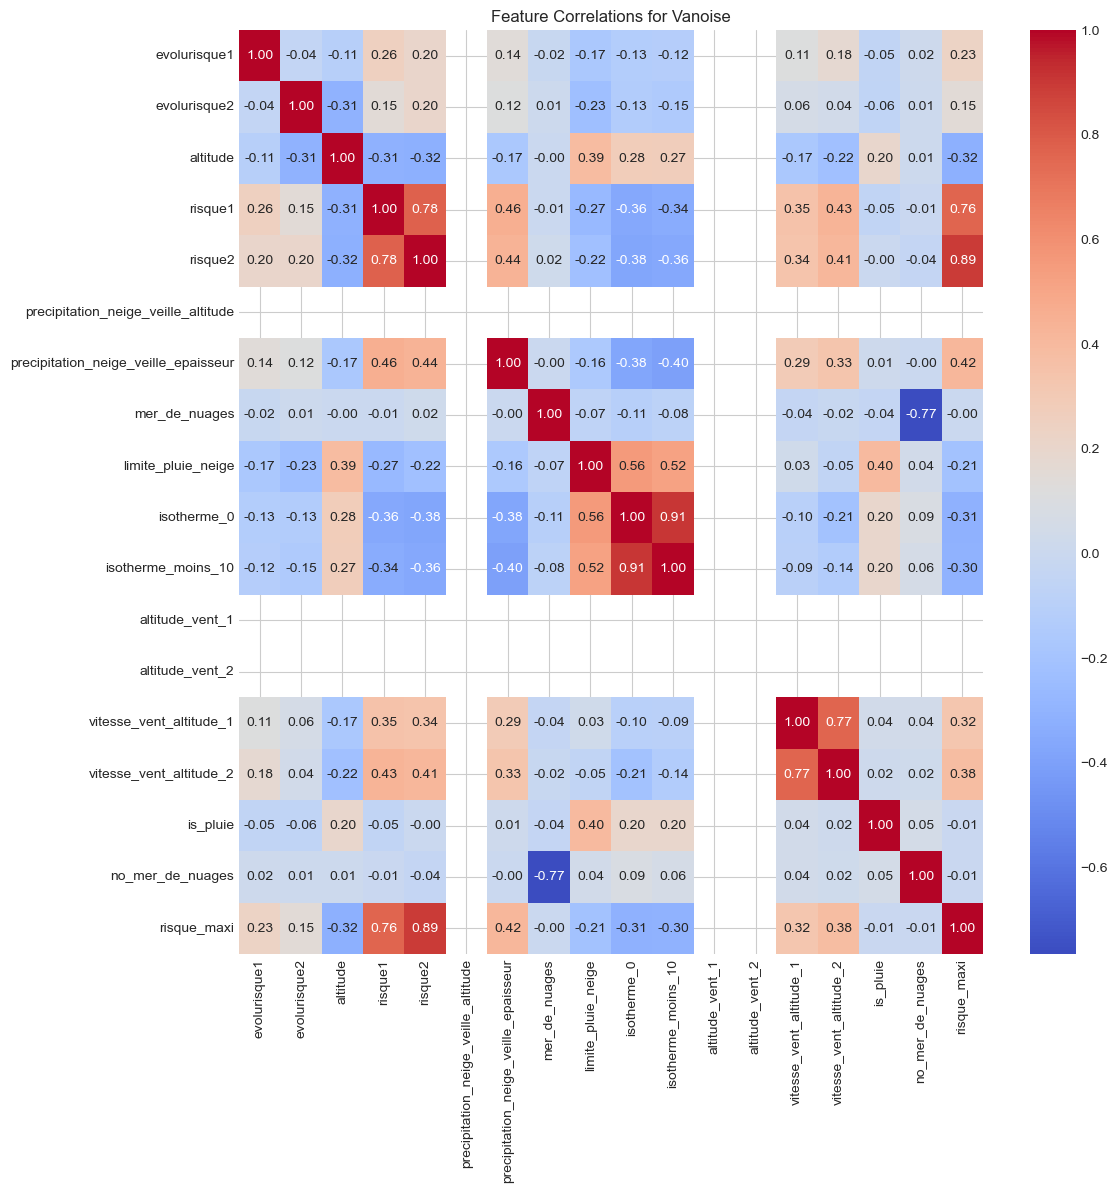

In [80]:
# Plot the correlation heatmap of the vanoise massif
numeric_data_vanoise = df_massifs['VANOISE'].select_dtypes(include=['number'])
print(df_massifs['VANOISE'].count())
corr_matrix = numeric_data_vanoise.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations for Vanoise")
plt.show()

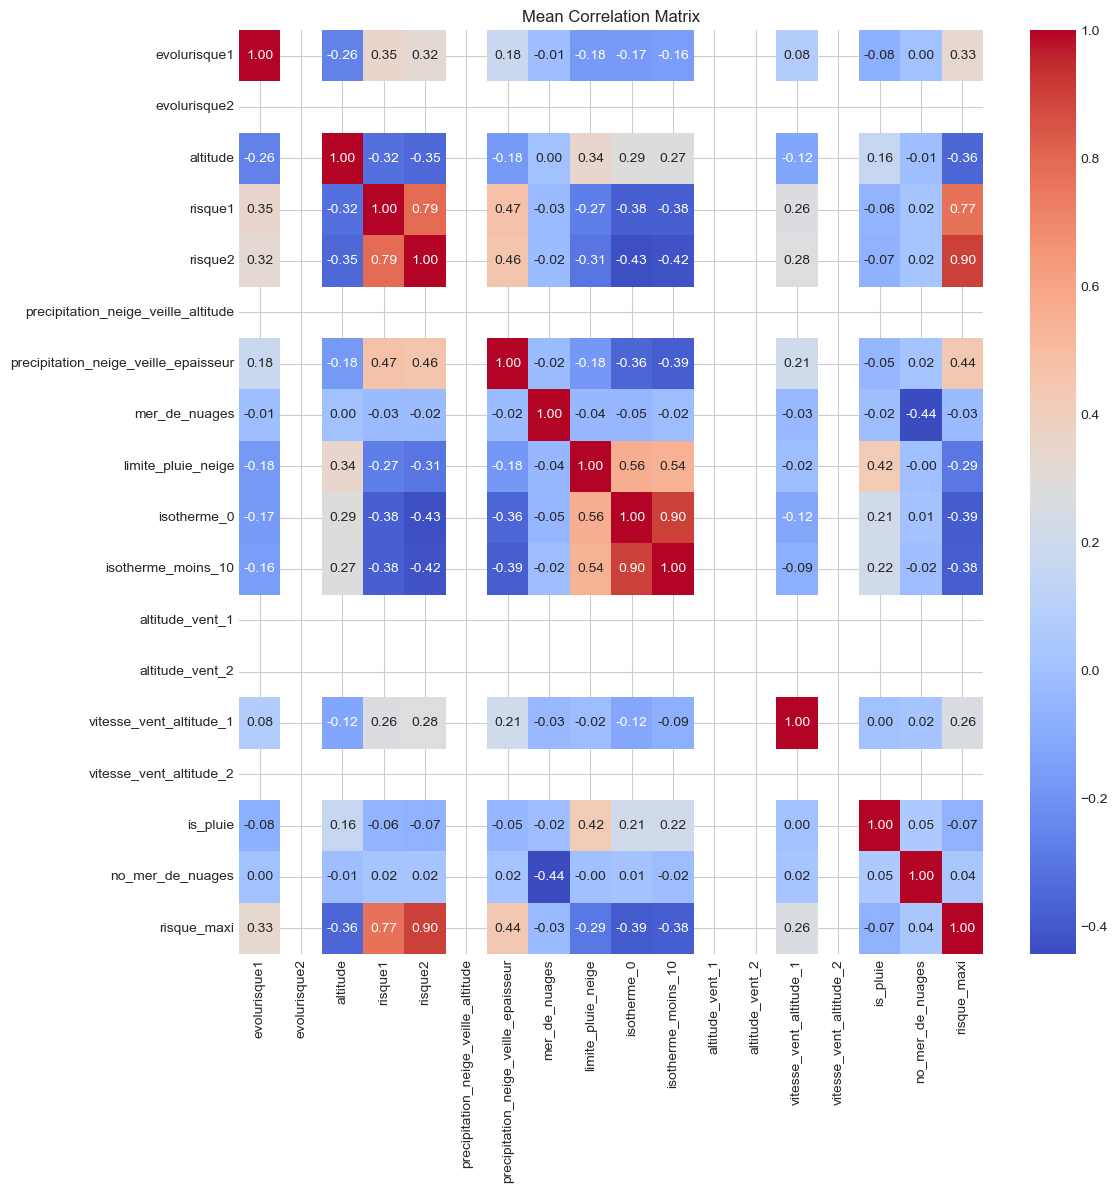

In [81]:
correlation_matrices = []

# Compute the correlation matrix for each region for hourly data
for _, df in df_massifs.items():
    if not df.empty:
        numeric_data = df.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr()
        correlation_matrices.append(corr_matrix)

# Compute the mean correlation matrix
if correlation_matrices:
    mean_correlation_matrix = sum(correlation_matrices) / len(correlation_matrices)

# Plot the mean correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Correlation Matrix')
plt.show()

In [82]:
# Correlation with the target variable
mean_correlation_matrix['risque_maxi'].sort_values(ascending=False)


risque_maxi                             1.000000
risque2                                 0.902100
risque1                                 0.765432
precipitation_neige_veille_epaisseur    0.437861
evolurisque1                            0.330311
vitesse_vent_altitude_1                 0.256247
no_mer_de_nuages                        0.039020
mer_de_nuages                          -0.030408
is_pluie                               -0.070030
limite_pluie_neige                     -0.291092
altitude                               -0.357303
isotherme_moins_10                     -0.384954
isotherme_0                            -0.391329
evolurisque2                                 NaN
precipitation_neige_veille_altitude          NaN
altitude_vent_1                              NaN
altitude_vent_2                              NaN
vitesse_vent_altitude_2                      NaN
Name: risque_maxi, dtype: float64

The correlation analysis indicates that **`risque2` (0.90) and `risque1` (0.77)** have the strongest positive relationships with `risque_maxi`, reinforcing their importance in predicting avalanche risk. Indeed, `risque_maxi` has been obtained by taking the maximum value between `risque1` and `risque2`, which explains the high correlation values.
Additionally, **`precipitation_neige_veille_epaisseur` (0.42)** shows a moderate positive correlation, suggesting that the amount of recent snowfall significantly influences avalanche risks. **`evolurisque1` (0.26), `vitesse_vent_altitude_1` (0.26), and `evolurisque2` (0.17)** also contribute meaningfully to the risk estimation process.

On the other hand, several features exhibit weak or negligible correlations, such as **`altitude_vent_1` (0.008), `precipitation_neige_veille_altitude` (0.008), `mer_de_nuages` (-0.03), and `is_pluie` (-0.07)**, indicating they may not significantly impact avalanche risk. 

Some features, including **`altitude` (-0.24), `isotherme_0` (-0.37), and `isotherme_moins_10` (-0.31)**, have moderate negative correlations, suggesting that lower altitudes and lower freezing levels might be associated with higher risks, but further investigation is needed before removal. 

Finally, **`altitude_vent_2` and `vitesse_vent_altitude_2`** contain missing correlation values (NaN), implying data inconsistencies or sparsity, making them strong candidates for removal. Based on these insights, we recommend keeping highly correlated features while dropping those with weak or missing correlations to enhance model performance.

In [83]:
# Create a list containig the features that have a correlation with the target variable greater than 0.1
features = mean_correlation_matrix['risque_maxi'][abs(mean_correlation_matrix['risque_maxi']) > 0.1].index.tolist()
features

['evolurisque1',
 'altitude',
 'risque1',
 'risque2',
 'precipitation_neige_veille_epaisseur',
 'limite_pluie_neige',
 'isotherme_0',
 'isotherme_moins_10',
 'vitesse_vent_altitude_1',
 'risque_maxi']

In [84]:
cat_features = df_massifs['VANOISE'].select_dtypes(include=['object', 'category']).columns.tolist()

In [85]:
for massif, df in df_massifs.items():
    df_massifs[massif] = df[cat_features + features]

### Comparison of X_df and X_df_van for the Vanoise massif

In [86]:
print("Columns of X_df: \n", X_df.columns)
print("Columns of X_df_van (VANOISE): \n",X_df_van.columns)

print("Columns of X_df not in X_df_van: \n")
list_not_in_van = []
for i in range(0, len(X_df.columns)):
    if X_df.columns[i] not in X_df_van.columns:
        list_not_in_van.append(X_df.columns[i])
print(list_not_in_van)

Columns of X_df: 
 Index(['massif', 'evolurisque1', 'evolurisque2', 'altitude', 'risque1',
       'risque2', 'precipitation_neige_veille_altitude',
       'precipitation_neige_veille_epaisseur', 'temps', 'mer_de_nuages',
       'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10',
       'altitude_vent_1', 'altitude_vent_2', 'direction_vent_altitude_1',
       'vitesse_vent_altitude_1', 'direction_vent_altitude_2',
       'vitesse_vent_altitude_2', 'is_pluie', 'no_mer_de_nuages',
       'altitude_bins', 'risk_diff'],
      dtype='object')
Columns of X_df_van (VANOISE): 
 Index(['temps', 'direction_vent_altitude_1', 'direction_vent_altitude_2',
       'evolurisque1', 'evolurisque2', 'altitude',
       'precipitation_neige_veille_epaisseur', 'limite_pluie_neige',
       'isotherme_0', 'isotherme_moins_10', 'vitesse_vent_altitude_1',
       'is_pluie'],
      dtype='object')
Columns of X_df not in X_df_van: 

['massif', 'risque1', 'risque2', 'precipitation_neige_veille_altitude', 'me

| Column | Why it was removed |
|--------|-------------------|
| `massif` | Redundant after filtering by massif |
| `risque1`, `risque2` | `risque_maxi` already represents the highest risk |
| `precipitation_neige_veille_altitude` | Transformed but not kept in final features |
| `mer_de_nuages` | Converted into `no_mer_de_nuages` and removed |
| `altitude_vent_1`, `altitude_vent_2` | Likely low correlation with avalanche risk |
| `vitesse_vent_altitude_2` | Wind speed at one altitude was enough |
| `no_mer_de_nuages` | Removed after transformation |

### Split the data into training and testing sets

As we are dealing with time series data, we will split the dataset based on the publication date.For the training data, we will use bulletins published from 2018 to 2022, and for the testing data, we will use bulletins published in 2023.

In [87]:
X_train_dict = {}
y_train_dict = {}
X_test_dict = {}
y_test_dict = {}

for massif in massifs:
    X_train_dict[massif], y_train_dict[massif] = problem.get_train_data(massif)
    X_test_dict[massif], y_test_dict[massif] = problem.get_test_data(massif)

# Challenge evaluation

A particularly important point in a challenge is to describe how it is evaluated. This is the section where you should describe the metric that will be used to evaluate the participants' submissions, as well as your evaluation strategy, in particular if there is some complexity in the way the data should be split to ensure valid results.

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [88]:
# %load submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def get_estimator(df_final):
    # Identify numerical and categorical features
    num_features = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

    # Preprocessing Pipelines
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
    )

    cat_pipeline = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore')
    )

    # Combine preprocessing steps
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

    # Define Model Pipeline 
    model_pipeline = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=1000)
    )
    # model_pipeline = make_pipeline(
    #     preprocessor,
    #     RandomForestClassifier(n_estimators=500, random_state=42)
    # )

    return model_pipeline


## Testing using a scikit-learn pipeline

In [89]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
model = get_estimator(X_df_van)
scores = cross_val_score(model, X_df_van, y_van, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores for the Vanoise massif:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores for the Vanoise massif: [0.59568733 0.57681941 0.61725067 0.54716981 0.50540541]
Mean Accuracy: 0.5684665258250163
Standard Deviation: 0.03904072474697386


In [90]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
X = X_train_dict['ANDORRE']
y = y_train_dict['ANDORRE']
model = get_estimator(X)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores for the Vanoise massif:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Accuracy Scores for the Vanoise massif: [0.45380435 0.45231608 0.46321526 0.47956403 0.50408719]
Mean Accuracy: 0.4705973818267978
Standard Deviation: 0.01935291282253192


In [91]:
from sklearn.metrics import accuracy_score

# Train and Evaluate the Model for Each Massif
accuracy_results = {}

for massif in X_train_dict.keys():
    print(f"Training model for {massif}...")

    X_train = X_train_dict[massif]
    y_train = y_train_dict[massif]
    X_test = X_test_dict[massif]
    y_test = y_test_dict[massif]

    model = get_estimator(X_train)  # Pass massif-specific dataset
    model.fit(X_train, y_train)  # Train model

    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy

    accuracy_results[massif] = accuracy
    print(f"Accuracy for {massif}: {accuracy:.4f}\n")

# Display overall results
print("\nOverall Accuracy Results:")
for massif, acc in accuracy_results.items():
    print(f"{massif}: {acc:.4f}")

# Compute Mean Accuracy Across Massifs
mean_accuracy = np.mean(list(accuracy_results.values()))
print(f"\nMean Accuracy Across Massifs: {mean_accuracy:.4f}")

Training model for ANDORRE...
Accuracy for ANDORRE: 0.5697

Training model for ARAVIS...
Accuracy for ARAVIS: 0.6288

Training model for ASPE-OSSAU...
Accuracy for ASPE-OSSAU: 0.6164

Training model for AURE-LOURON...
Accuracy for AURE-LOURON: 0.6301

Training model for BAUGES...
Accuracy for BAUGES: 0.5657

Training model for BEAUFORTAIN...
Accuracy for BEAUFORTAIN: 0.4366

Training model for BELLEDONNE...
Accuracy for BELLEDONNE: 0.6194

Training model for CAPCIR-PUYMORENS...
Accuracy for CAPCIR-PUYMORENS: 0.4255

Training model for CERDAGNE-CANIGOU...
Accuracy for CERDAGNE-CANIGOU: 0.3735

Training model for CHABLAIS...
Accuracy for CHABLAIS: 0.6099

Training model for CHAMPSAUR...
Accuracy for CHAMPSAUR: 0.6479

Training model for CHARTREUSE...
Accuracy for CHARTREUSE: 0.5106

Training model for CINTO-ROTONDO...
Accuracy for CINTO-ROTONDO: 0.5320

Training model for COUSERANS...
Accuracy for COUSERANS: 0.3783

Training model for DEVOLUY...
Accuracy for DEVOLUY: 0.6221

Training mod

## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).

In [92]:
!ramp-test --submission starting_kit

Testing Prediction of the avalanche risk
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  accuracy      time
	train    0.6104  0.220465
	valid    0.5842  0.009463
	test     0.5626  0.004661
CV fold 1
	score  accuracy      time
	train    0.6219  0.065687
	valid    0.5571  0.008959
	test     0.5485  0.007721
CV fold 2
	score  accuracy      time
	train    0.6117  0.068530
	valid    0.5408  0.010295
	test     0.5792  0.006703
CV fold 3
	score  accuracy      time
	train    0.5974  0.071749
	valid    0.6277  0.008380
	test     0.5674  0.006194
CV fold 4
	score  accuracy      time
	train    0.6083  0.062627
	valid    0.6060  0.005962
	test     0.5508  0.007543
CV fold 5
	score  accuracy      time
	train    0.6117  0.073178
	valid    0.6005  0.007692
	test     0.5626  0.005286
CV fold 6
	score  accuracy      time
	train    0.6172  0.069088
	valid    0.5707  0.007604
	test     0.5650  0.005713
CV fold 7
	score  accuracy      ti

c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:106: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:106: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:106: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve